In [12]:

import time
import pickle, warnings
import pandas as pd
import numpy as np
from PyEMD import EEMD
from scipy.signal import hilbert

import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
warnings.filterwarnings("ignore")

In [2]:
TOOL = 'T05-1'
data = pd.read_csv(TOOL + '_tool_group.csv')
data

CurrentTime  SpindLoad  x_load  y_load  z_load  Feed  \
0       2018-08-30 08:28:27:755       0.26     0.5     4.2     0.9   142   
1       2018-08-30 08:28:27:883       0.26     0.6     4.2     0.9   142   
2       2018-08-30 08:28:28:645       0.26     0.5     4.2     0.8   142   
3       2018-08-30 08:28:28:773       0.26     0.5     4.2     0.8   142   
4       2018-08-30 08:28:28:908       0.27     0.5     4.2     0.8   142   
5       2018-08-30 08:28:29:036       0.27     0.6     4.2     0.8   142   
6       2018-08-30 08:28:29:164       0.26     0.6     4.2     0.8   142   
7       2018-08-30 08:28:29:292       0.24     0.5     4.2     0.8   142   
8       2018-08-30 08:28:29:509       0.26     0.6     4.2     0.9   142   
9       2018-08-30 08:28:29:676       0.26     0.5     4.2     0.8   142   
10      2018-08-30 08:28:29:812       0.25     0.6     4.2     0.9   142   
11      2018-08-30 08:28:29:948       0.26     0.6     4.2     0.9   142   
12      2018-08-30 08:28:41:893       0.14     0.3     4.1     0.8   142   
13      2018-08-30 08:28:42:029       0.13     0.3     4.1     0.8   142   
14      2018-08-30 08:28:42:157       0.13     0.2     4.1     0.9   142   
15      2018-08-30 08:28:42:285       0.13     0.2     4.1     0.8   142   
16      2018-08-30 08:28:42:412       0.14     0.3     4.1     0.8   142   
17      2018-08-30 08:28:42:541       0.13     0.3     4.1     0.8   142   
18      2018-08-30 08:28:42:669       0.13     0.3     4.1     0.9   142   
19      2018-08-30 08:28:42:808       0.13     0.2     4.1     0.8   142   
20      2018-08-30 08:28:43:037       0.13     0.3     4.1     0.8   142   
21      2018-08-30 08:28:43:189       0.14     0.3     4.1     0.9   142   
22      2018-08-30 08:28:43:325       0.14     0.3     4.1     0.9   142   
23      2018-08-30 08:28:43:461       0.13     0.2     4.1     0.9   142   
24      2018-08-30 08:28:44:381       0.13     0.3     4.1     0.8   142   
25      2018-08-30 08:28:44:541       0.13     0.4     4.1     0.8   142   
26      2018-08-30 08:28:44:677       0.13     0.3     4.1     0.7   142   
27      2018-08-30 08:28:44:813       0.13     0.4     4.2     0.7   142   
28      2018-08-30 08:28:44:941       0.13     0.4     4.2     0.7   142   
29      2018-08-30 08:28:45:068       0.13     0.3     4.2     0.8   142   
...                         ...        ...     ...     ...     ...   ...   
405659  2018-09-07 08:10:02:816       4.01     0.3     4.2     2.4   142   
405660  2018-09-07 08:10:02:932       3.28     0.2     4.3     2.5   142   
405661  2018-09-07 08:10:03:076       3.33     0.3     4.2     2.3   142   
405662  2018-09-07 08:10:03:280       6.79     0.2     4.2     2.4   142   
405663  2018-09-07 08:10:03:401       6.14     0.2     4.2     2.3   142   
405664  2018-09-07 08:10:03:521       4.54     0.2     4.2     2.6   142   
405665  2018-09-07 08:10:03:636       4.01     0.3     4.3     2.7   142   
405666  2018-09-07 08:10:03:758       3.74     0.3     4.2     2.5   142   
405667  2018-09-07 08:10:03:873       4.72     0.2     4.2     2.8   142   
405668  2018-09-07 08:10:03:989       5.63     0.2     4.2     2.9   142   
405669  2018-09-07 08:10:04:105       5.37     0.2     4.3     2.6   142   
405670  2018-09-07 08:10:04:225       4.58     0.2     4.2     2.5   142   
405671  2018-09-07 08:10:04:361       3.80     0.2     4.2     2.5   142   
405672  2018-09-07 08:10:04:558       4.36     0.3     4.2     2.9   142   
405673  2018-09-07 08:10:04:713       5.27     0.2     4.3     2.7   142   
405674  2018-09-07 08:10:04:833       5.15     0.2     4.2     2.6   142   
405675  2018-09-07 08:10:04:949       4.42     0.3     4.2     2.4   142   
405676  2018-09-07 08:10:05:056       4.18     0.3     4.2     2.7   142   
405677  2018-09-07 08:10:05:172       4.39     0.2     4.3     2.4   142   
405678  2018-09-07 08:10:05:281       4.80     0.2     4.3     2.7   142   
405679  2018-09-07 08:10:05:396       5.44     0.2     4.2     2.8  

In [3]:
statistic = data.groupby(by=['group']).agg('count').reset_index()
statistic[statistic.subgroup<256].count()

group          50
CurrentTime    50
SpindLoad      50
x_load         50
y_load         50
z_load         50
Feed           50
Speed          50
m_abs_x        50
m_abs_y        50
m_abs_z        50
modal_gcode    50
subgroup       50
dtype: int64

In [130]:
eemd = EEMD()

class group_transform:
    def __init__(self, group_id, spindload):
        self.group_id = group_id
        self.spindload = spindload
        self.SAMPLE_RATE = 128
        self.FFT_SIZE = 256
        self.FREQ = np.linspace(0, self.SAMPLE_RATE/2, self.FFT_SIZE/2+1)
        self.eIMFs = None
        self.freq_spectrum = None
        self.power_spectrum = None
        self.cepstrum = None
        self.instant_freqs = None
        self.IMF_ptp = {}
        self.IMF_rms = {}
        self.FREQ_max_amp_freq = {}
        self.FREQ_mean = {}
        self.FREQ_std = {}
        self.CEPS_mid_mean = {}
        self.CEPS_mid_std = {}
        self.INST_max_amp_freq = {}
        self.INST_min_amp_freq = {}
        self.INST_mean = {}
        self.INST_std = {}
        
    def EEMD(self):
        t = np.arange(len(self.spindload))
        self.eIMFs = eemd.eemd(self.spindload, t)
        
    def FFT(self):
        freq_spectrum = {}
        power_spectrum = {}
        cepstrum = {}
        for n in range(self.eIMFs.shape[0]):
            x = self.eIMFs[n]
            if len(x)<self.FFT_SIZE:
                continue
            xs = x[-1*self.FFT_SIZE:]
            xf = np.fft.rfft(xs) / self.FFT_SIZE
            freq_spectrum[n] = np.abs(xf)#
            
            cor_x = np.correlate(xs, xs, 'same')
            cor_X = np.fft.fft(cor_x, self.FFT_SIZE)
            ps_cor = np.abs(cor_X)
            ps_cor = ps_cor / np.max(ps_cor)
            power_spectrum[n] = ps_cor
            
            spectrum = np.fft.fft(xs, n=self.FFT_SIZE)
            ceps = np.fft.ifft(np.log(np.abs(spectrum))).real
            ceps = np.abs(ceps)
            cepstrum[n] = ceps
        
        self.freq_spectrum = freq_spectrum 
        self.power_spectrum = power_spectrum 
        self.cepstrum = cepstrum 

    def instant_phase(self, imfs):
        analytic_signal = hilbert(imfs)  # Apply Hilbert transform to each row
        phase = np.unwrap(np.angle(analytic_signal))  # Compute angle between img and real
        return phase
    
    def HT(self):
        DT = 0.2
        instant_phases = self.instant_phase(self.eIMFs)
        instant_freqs = np.diff(instant_phases)/(2*np.pi*DT)
        instant_freqs_ht = {}
        for num, instant_freq in enumerate(instant_freqs):
            instant_freqs_ht[num] = instant_freq
        self.instant_freqs = instant_freqs_ht
    
    def analyze(self):
        ### time domain for IMF
        imf_ptp_ht = {}
        imf_rms_ht = {}
        for i in range(self.eIMFs.shape[0]):
            x = self.eIMFs[i]
            imf_ptp_ht[i] = np.ptp(x)
            imf_rms_ht[i] = np.sqrt(np.mean(x**2))
        self.IMF_ptp = imf_ptp_ht
        self.IMF_rms = imf_rms_ht
        
        ### freq domain for IMF+FFT, IMF+HT
        FREQ_max_amp_freq = {}
        FREQ_mean = {}
        FREQ_std = {}
        for i in self.freq_spectrum.keys():
            freq = self.freq_spectrum[i]
            FREQ_max_amp_freq[i] = self.FREQ[np.argmax(freq)]
            FREQ_mean[i] = np.mean(freq)
            FREQ_std[i] = np.std(freq)
        self.FREQ_max_amp_freq = FREQ_max_amp_freq
        self.FREQ_mean = FREQ_mean
        self.FREQ_std = FREQ_std
        
        cep_mean_ht = {}
        cep_std_ht = {}
        for i in self.cepstrum.keys():
            ceps = self.cepstrum[i]
            r = int(0.05*len(ceps))
            ceps = ceps[r:len(ceps)-r]
            cep_mean_ht[i] = np.mean(ceps)
            cep_std_ht[i] = np.std(ceps)
        self.CEPS_mid_mean = cep_mean_ht
        self.CEPS_mid_std = cep_std_ht
        
        INST_max_amp_freq = {}
        INST_min_amp_freq = {}
        INST_mean = {}
        INST_std = {}
        for i in self.instant_freqs.keys():
            instant_freq = self.instant_freqs[i]
            instant_freq = instant_freq[:int(len(instant_freq)/2)]
            INST_max_amp_freq[i] = np.argmax(instant_freq)
            INST_min_amp_freq[i] = np.argmin(instant_freq)
            INST_mean[i] = np.mean(instant_freq)
            INST_std[i] = np.std(instant_freq)
        self.INST_max_amp_freq = INST_max_amp_freq
        self.INST_min_amp_freq = INST_min_amp_freq
        self.INST_mean = INST_mean
        self.INST_std = INST_std
        
    def eIMF_plot(self, xs, group_id, imf_id):
        plt.plot(xs)
        plt.xlabel(u"time(sec)")
        plt.title('group '+str(group_id)+' IMF '+str(imf_id))
        plt.show()
    
    def freq_spec_plot(self, xfp):
        plt.plot(self.FREQ, xfp)
        plt.xlabel(u"freqs(Hz)")
        plt.ylabel('db')
        plt.show()
    
    def power_spec_plot(self, ps_cor):
        plt.plot(self.FREQ, 20*np.log10(ps_cor[:int(self.FFT_SIZE/2)+1]))
        
        plt.xlabel(u"freqs(Hz)")
        plt.ylabel('db')
        plt.show()
    
    def cepstrum_plot(self, ceps):
        plt.plot(ceps)            
        plt.xlabel(u"time(sec)")
        plt.ylabel('db')
        plt.show()
        
    def instant_freq_plot(self, instant_freq, imf_id):
        plt.xlabel("Time [s]")
        plt.ylabel("Inst. Freq. [Hz]")
        plt.title("Huang-Hilbert Transform of IMF"+str(imf_id))
        t = range(len(instant_freq))
        plt.plot(t, instant_freq)
        plt.show()


In [132]:
def generate_gt(group_ht, group_list, col='SpindLoad'):
    for g in group_list:
        print('group', g)
        gt = group_transform(g, data[data['group']==g][col].values)
        gt.EEMD()
        gt.FFT()
        gt.HT()
        gt.analyze()
        group_ht[g] = gt
    return group_ht

In [133]:
group_ht = {}
sl_gt = generate_gt(group_ht, [10,100,300,500,700,900,1100,1119], col='SpindLoad')

group 10
group 100
group 300
group 500
group 700
group 900
group 1100
group 1119


In [ ]:
group_ht = {}
zl_gt = generate_gt(group_ht, [10,100,300,500,700,900,1100,1119], col='z_load')

group 10
group 100
group 300
group 500
group 700
group 900


In [117]:
class level_state:
    def __init__(self, group_ht, level_id):
        self.level_id = level_id
        self.group_ht = group_ht
        self.IMF_ptp = []
        self.IMF_rms = []
        self.FREQ_max_amp_freq = []
        self.FREQ_mean = []
        self.FREQ_std = []
        self.CEPS_mid_mean = []
        self.CEPS_mid_std = []
        self.INST_max_amp_freq = [] 
        self.INST_min_amp_freq = []
        self.INST_mean = []
        self.INST_std = []
    def calc(self):
        gs = []
        for g in sorted(list(self.group_ht.keys())):
            print('group', g)
            gt = self.group_ht[g]
            l = self.level_id
            if l not in gt.FREQ_max_amp_freq.keys():
                continue
            gs.append(g)
            self.IMF_ptp.append(gt.IMF_ptp[l])
            self.IMF_rms.append(gt.IMF_rms[l])
            self.FREQ_max_amp_freq.append(gt.FREQ_max_amp_freq[l])
            self.FREQ_mean.append(gt.FREQ_mean[l])     
            self.FREQ_std.append(gt.FREQ_std[l])   
            self.CEPS_mid_mean.append(gt.CEPS_mid_mean[l])    
            self.CEPS_mid_std.append(gt.CEPS_mid_std[l])   
            self.INST_max_amp_freq.append(gt.INST_max_amp_freq[l])   
            self.INST_min_amp_freq.append(gt.INST_min_amp_freq[l])   
            self.INST_mean.append(gt.INST_mean[l])   
            self.INST_std.append(gt.INST_std[l])   
        return gs

In [120]:
#for g in [10, 100, 500, 750, 1000, 1050, 1100, 1119]:
def sup_plot(arr, title,x=None):
    plt.title(title)
    plt.xlabel('group_id')
    if x==None:
        plt.plot(arr)
    else:
        plt.plot(x, arr)
    #print('avg', np.mean(arr))
    #print('sum', np.sum(arr))
    plt.show()

def detail_plot_by_IMF_level(group_ht, MAX_LEVEL=7):
    for l in range(1, MAX_LEVEL+1):
        ls = level_state(group_ht, l)
        x = ls.calc()
        print('level---------------------------------------------------------- ', l)
        sup_plot(ls.IMF_ptp, 'IMF_ptp', x)
        sup_plot(ls.IMF_rms, 'IMF_rms', x)
        sup_plot(ls.FREQ_max_amp_freq, 'FREQ_max_amp_freq', x)
        sup_plot(ls.FREQ_mean, 'FREQ_mean', x)
        sup_plot(ls.FREQ_std, 'FREQ_std', x)
        sup_plot(ls.CEPS_mid_mean, 'CEPS_mid_mean', x)
        sup_plot(ls.CEPS_mid_std, 'CEPS_mid_std', x)
        sup_plot(ls.INST_max_amp_freq, 'INST_max_amp_freq', x)
        sup_plot(ls.INST_min_amp_freq, 'INST_min_amp_freq', x)
        sup_plot(ls.INST_mean, 'INST_mean', x)
        sup_plot(ls.INST_std, 'INST_std', x)
          
def detail_plot_by_group(group_ht, g):
    gt = group_ht[g]
    IMF_ptp = []
    IMF_rms = []
    FREQ_max_amp_freq = []
    FREQ_mean = []
    FREQ_std = []
    CEPS_mid_mean = []
    CEPS_mid_std = []
    INST_max_amp_freq = [] 
    INST_min_amp_freq = []
    INST_mean = []
    INST_std = []
       
    for i in gt.IMF_ptp.keys():
        IMF_ptp.append(gt.IMF_ptp[i])
        IMF_rms.append(gt.IMF_rms[i])
    
    for i in gt.FREQ_max_amp_freq.keys():
        FREQ_max_amp_freq.append(gt.FREQ_max_amp_freq[i])
        FREQ_mean.append(gt.FREQ_mean[i])
        FREQ_std.append(gt.FREQ_std[i])
        
    for i in gt.CEPS_mid_mean.keys():    
        CEPS_mid_mean.append(gt.CEPS_mid_mean[i])
        CEPS_mid_std.append(gt.CEPS_mid_std[i])
    
    for i in gt.INST_max_amp_freq.keys():
        INST_max_amp_freq.append(gt.INST_max_amp_freq[i])
        INST_min_amp_freq.append(gt.INST_min_amp_freq[i])        
        INST_mean.append(gt.INST_mean[i])
        INST_std.append(gt.INST_std[i])
    sup_plot(IMF_ptp, 'IMF_ptp')
    sup_plot(IMF_rms, 'IMF_rms')
    sup_plot(FREQ_max_amp_freq, 'FREQ_max_amp_freq')
    sup_plot(FREQ_mean, 'FREQ_mean')
    sup_plot(FREQ_std, 'FREQ_std')
    sup_plot(CEPS_mid_mean, 'CEPS_mid_mean')
    sup_plot(CEPS_mid_std, 'CEPS_mid_std')
    sup_plot(INST_max_amp_freq, 'INST_max_amp_freq')
    sup_plot(INST_min_amp_freq, 'INST_min_amp_freq')
    sup_plot(INST_mean, 'INST_mean')
    sup_plot(INST_std, 'INST_std')


In [ ]:
detail_plot_by_IMF_level(sl_gt)

In [ ]:
detail_plot_by_IMF_level(zl_gt)

avg 1.6804943859278592
sum 15.124449473350733


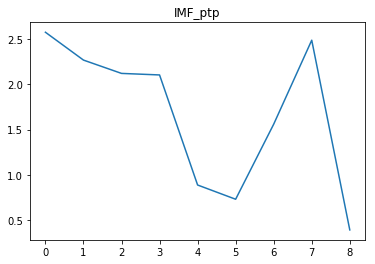

avg 0.5882298550956813
sum 5.294068695861132


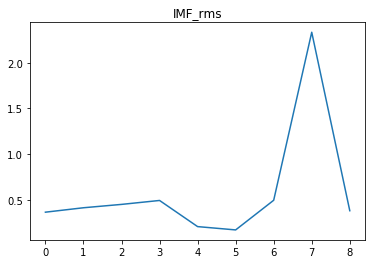

avg 7.555555555555555
sum 68.0


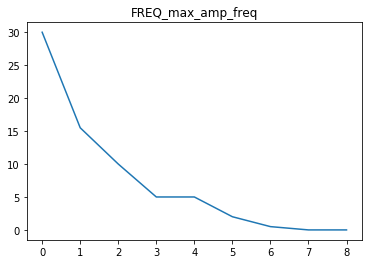

avg 0.012354133625458383
sum 0.11118720262912545


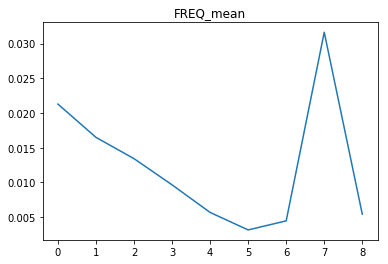

avg 0.0447561305662575
sum 0.40280517509631747


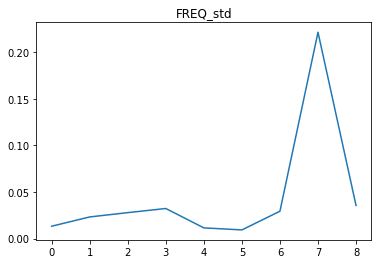

avg 0.01684200992436427
sum 0.15157808931927844


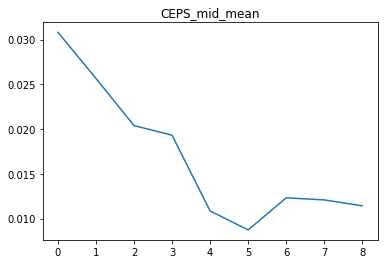

avg 0.013519012856730288
sum 0.12167111571057258


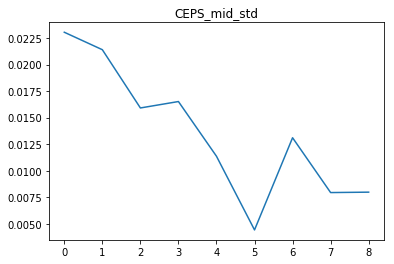

avg 75.11111111111111
sum 676


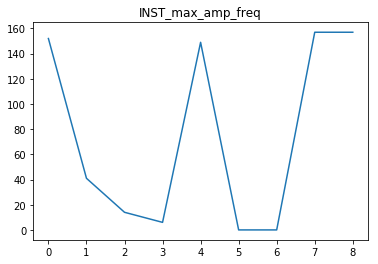

avg 44.333333333333336
sum 399


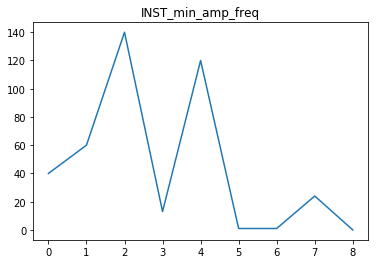

avg 0.28881420370387906
sum 2.5993278333349115


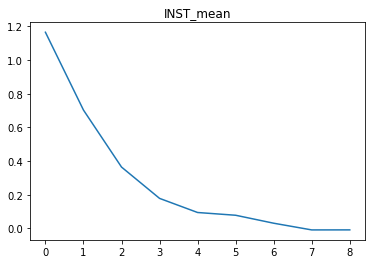

avg 0.23554116200748332
sum 2.11987045806735


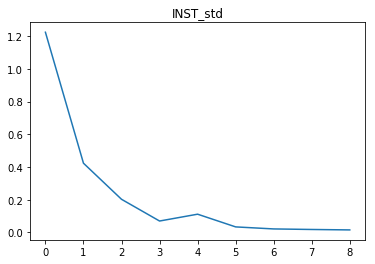

In [62]:
detail_plot_by_group(group_ht, 10)


avg 1.4946681776419253
sum 13.452013598777327


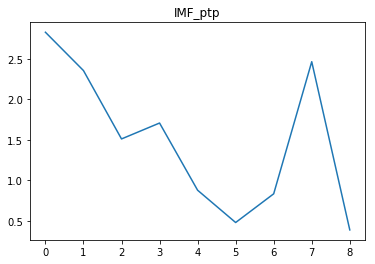

avg 0.48983191465249465
sum 4.408487231872452


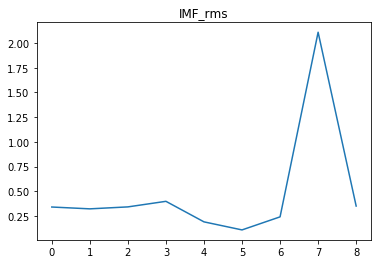

avg 8.166666666666666
sum 73.5


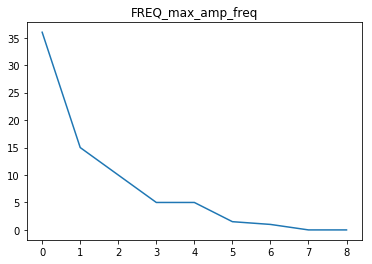

avg 0.010090755208305593
sum 0.09081679687475033


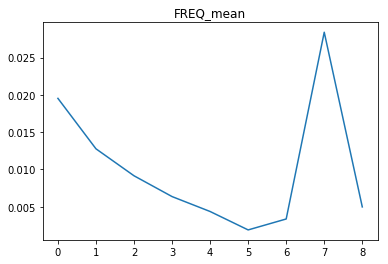

avg 0.0387114342595366
sum 0.34840290833582943


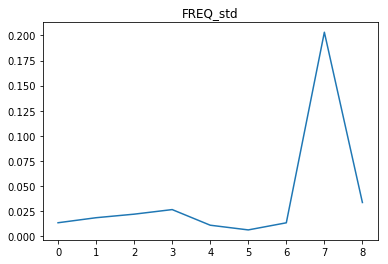

avg 0.02027402311992481
sum 0.1824662080793233


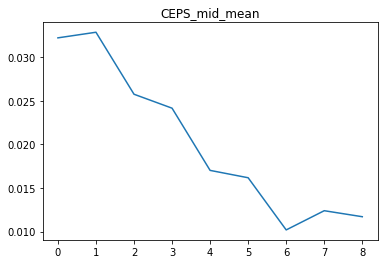

avg 0.016520563416648412
sum 0.14868507074983572


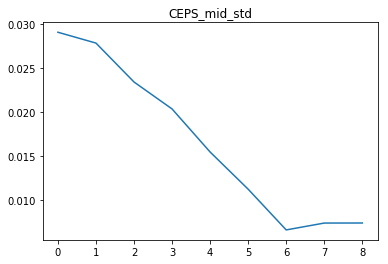

avg 43.333333333333336
sum 390


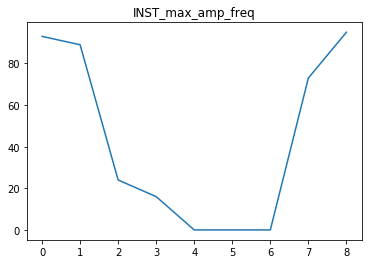

avg 34.77777777777778
sum 313


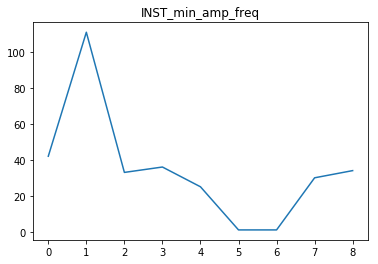

avg 0.2740751036630569
sum 2.4666759329675116


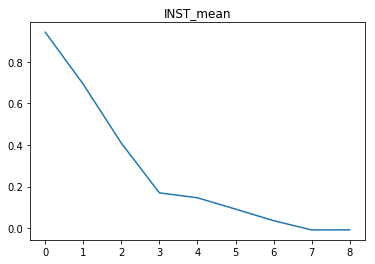

avg 0.2827741484282647
sum 2.5449673358543823


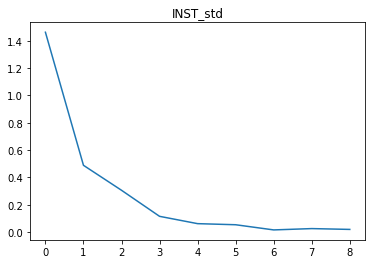

In [63]:
detail_plot_by_group(group_ht, 100)


avg 1.2426650303814175
sum 12.426650303814174


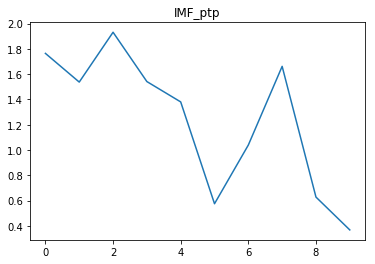

avg 0.4332210850479535
sum 4.332210850479535


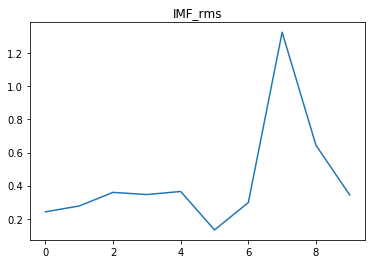

avg 6.1
sum 61.0


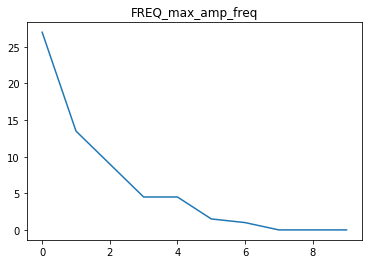

avg 0.008627059547586649
sum 0.08627059547586649


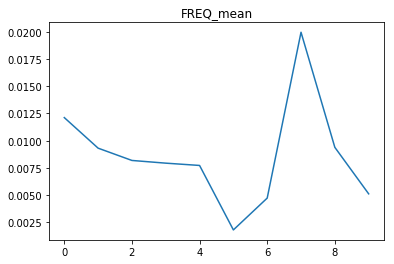

avg 0.03084952645316232
sum 0.3084952645316232


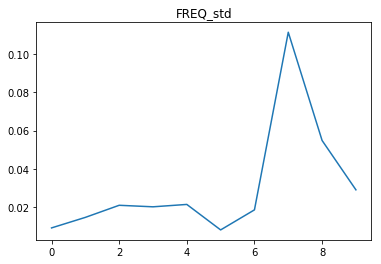

avg 0.01650645048780732
sum 0.16506450487807323


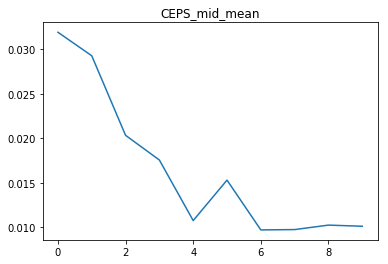

avg 0.014673421322736187
sum 0.14673421322736188


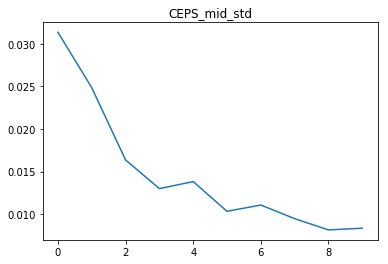

avg 59.8
sum 598


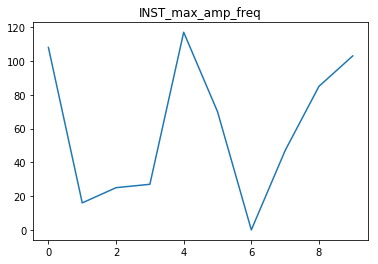

avg 37.4
sum 374


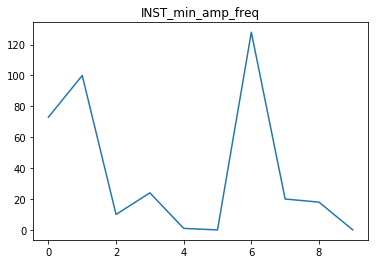

avg 0.21571094347365202
sum 2.1571094347365203


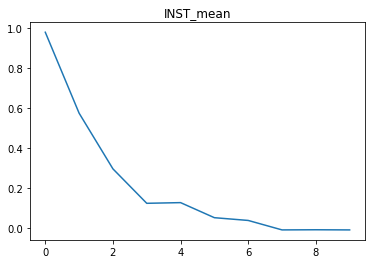

avg 0.23880486325109485
sum 2.3880486325109485


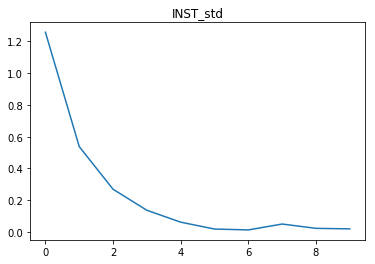

In [64]:
detail_plot_by_group(group_ht, 500)


avg 2.4156024947739647
sum 24.156024947739645


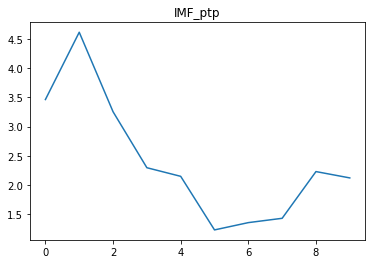

avg 0.6862205084601658
sum 6.862205084601658


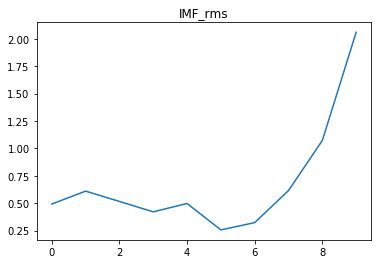

avg 6.25
sum 62.5


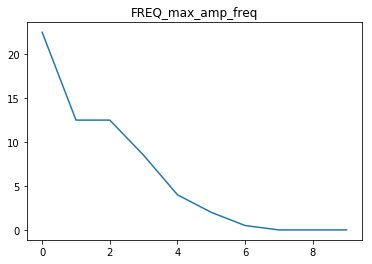

avg 0.015229315377024464
sum 0.15229315377024463


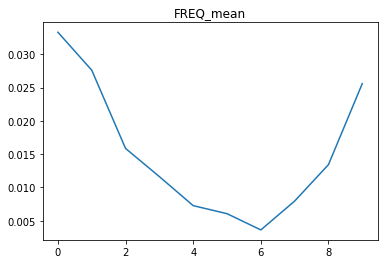

avg 0.05700747907595325
sum 0.5700747907595325


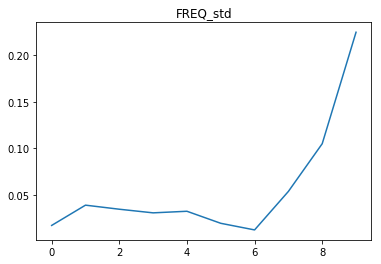

avg 0.02038456775993381
sum 0.20384567759933808


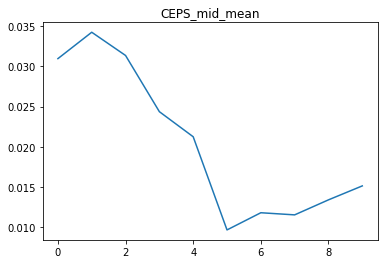

avg 0.015537866113928359
sum 0.15537866113928359


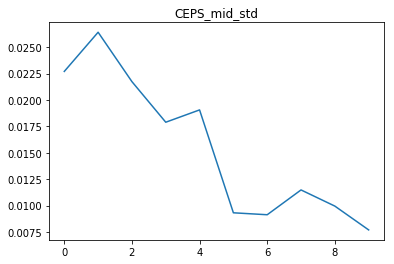

avg 113.9
sum 1139


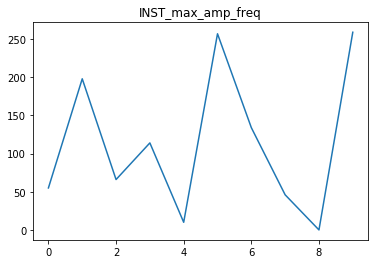

avg 28.2
sum 282


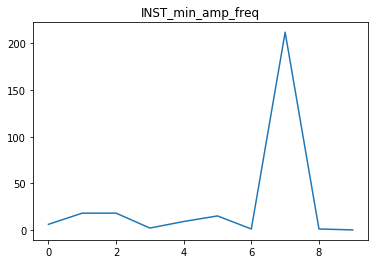

avg 0.2868658326527679
sum 2.868658326527679


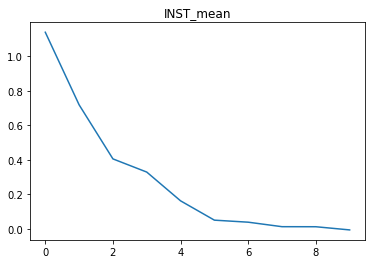

avg 0.23953551510115653
sum 2.3953551510115654


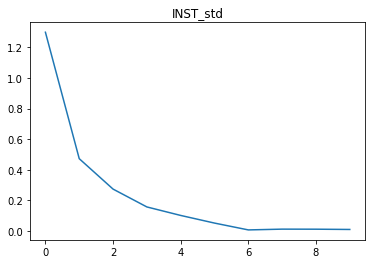

In [65]:
detail_plot_by_group(group_ht, 1000)


avg 1.730807306473963
sum 17.30807306473963


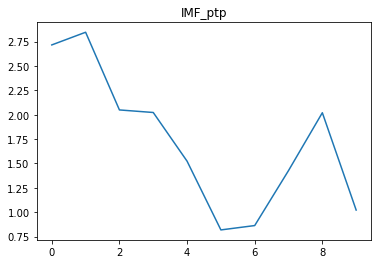

avg 0.5719953821990358
sum 5.719953821990358


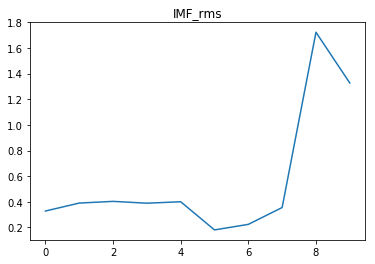

avg 7.1
sum 71.0


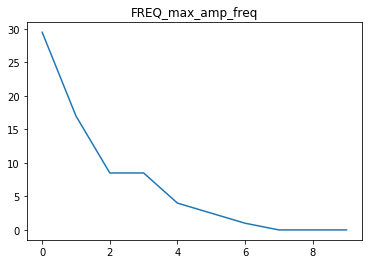

avg 0.010349498480130694
sum 0.10349498480130694


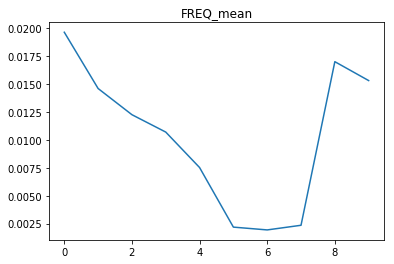

avg 0.04549474856596634
sum 0.45494748565966336


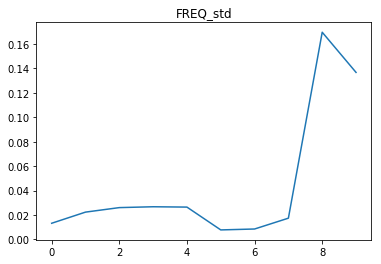

avg 0.018265366297935716
sum 0.18265366297935717


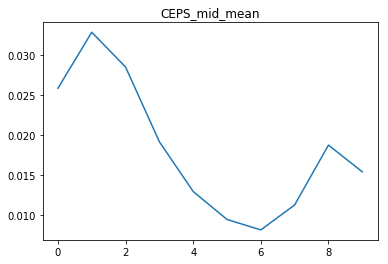

avg 0.015219798874222784
sum 0.15219798874222784


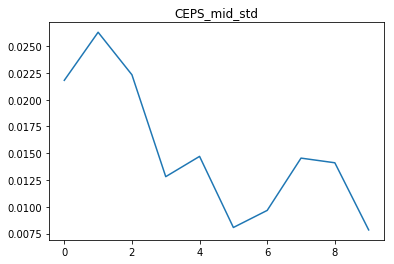

avg 73.6
sum 736


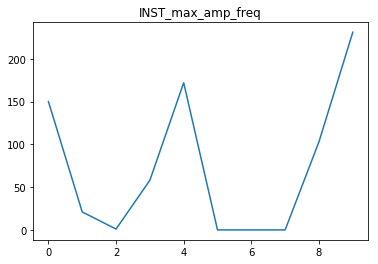

avg 14.8
sum 148


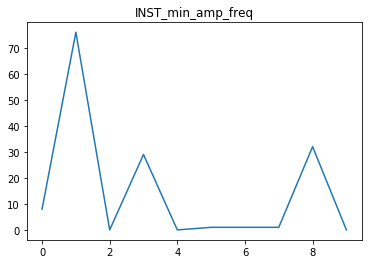

avg 0.26793611243604254
sum 2.6793611243604256


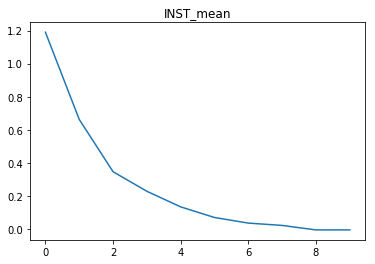

avg 0.21375376627834428
sum 2.137537662783443


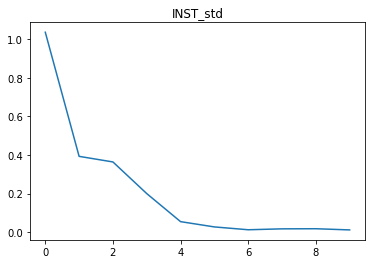

In [66]:
detail_plot_by_group(group_ht, 1050)


avg 2.1193960891823798
sum 21.1939608918238


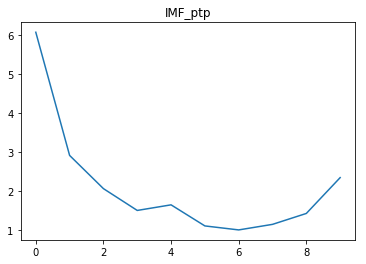

avg 0.6100872735487735
sum 6.100872735487735


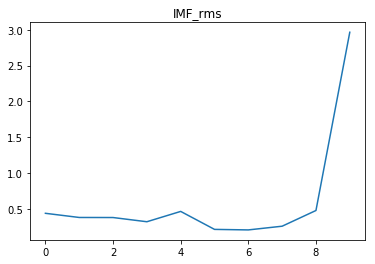

avg 9.25
sum 92.5


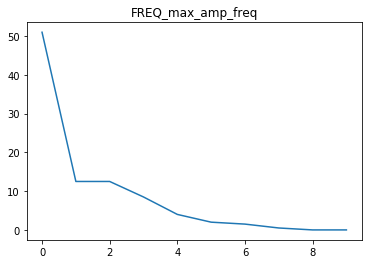

avg 0.012196507763105682
sum 0.12196507763105682


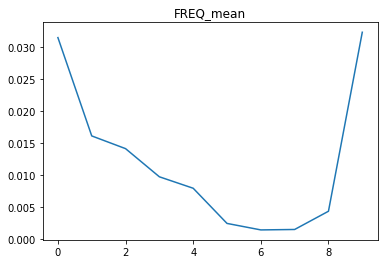

avg 0.04694888230844185
sum 0.4694888230844185


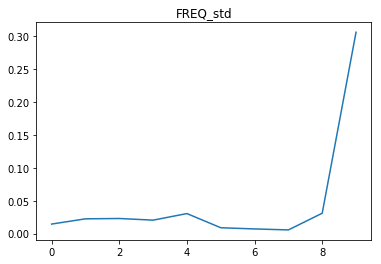

avg 0.016597776575171252
sum 0.16597776575171252


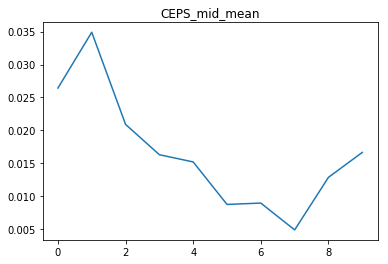

avg 0.014844150658924938
sum 0.14844150658924937


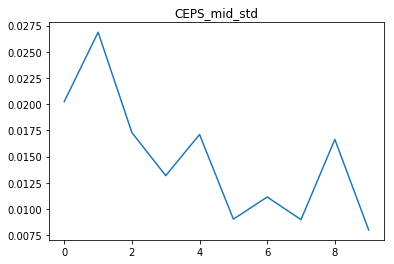

avg 78.4
sum 784


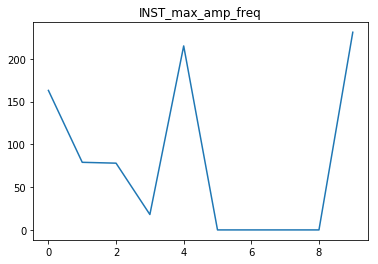

avg 55.0
sum 550


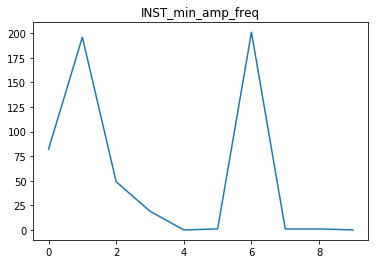

avg 0.26091381651554035
sum 2.6091381651554033


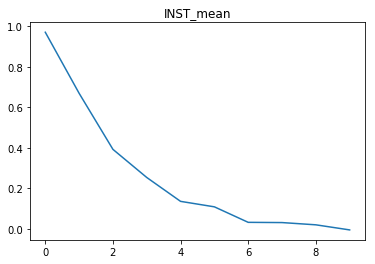

avg 0.23913102964793115
sum 2.3913102964793116


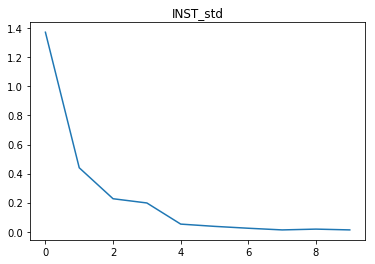

In [67]:
detail_plot_by_group(group_ht, 1100)


avg 1.770723388106169
sum 19.47795726916786


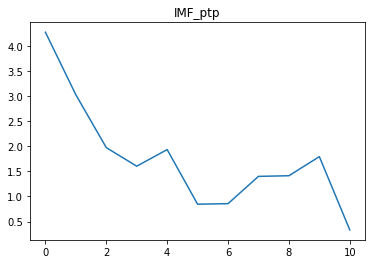

avg 0.5490996286605426
sum 6.040095915265969


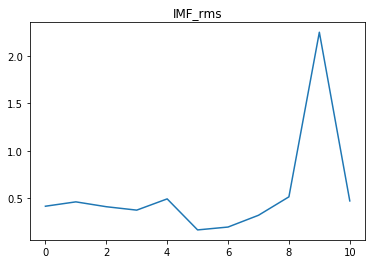

avg 6.409090909090909
sum 70.5


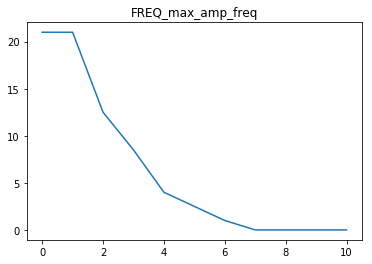

avg 0.010494146269161347
sum 0.11543560896077482


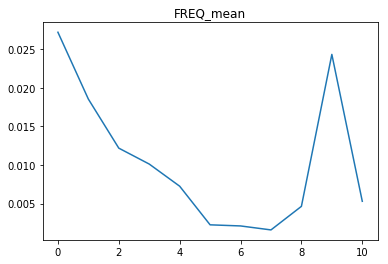

avg 0.04121345625689289
sum 0.4533480188258218


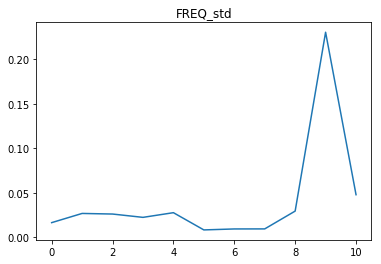

avg 0.018639604764229052
sum 0.20503565240651958


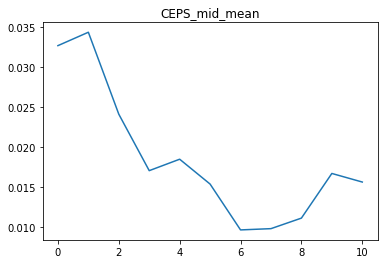

avg 0.015054334163610981
sum 0.1655976757997208


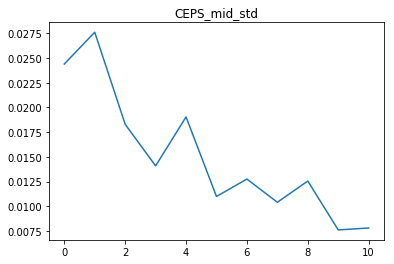

avg 81.18181818181819
sum 893


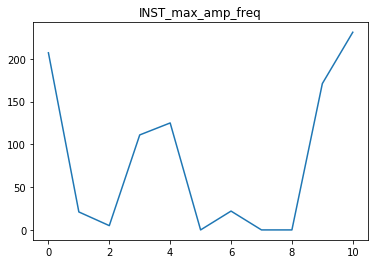

avg 56.90909090909091
sum 626


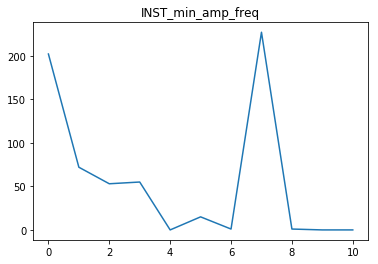

avg 0.2350200713165293
sum 2.5852207844818222


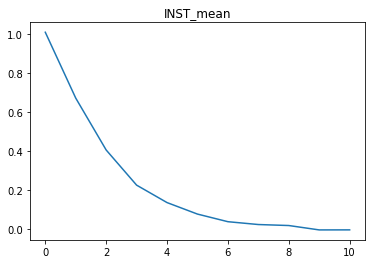

avg 0.22690771602284315
sum 2.4959848762512746


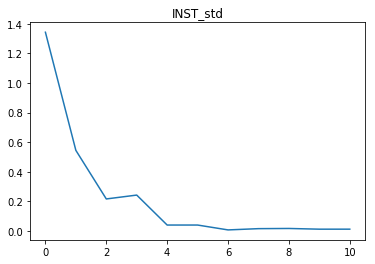

In [68]:
detail_plot_by_group(group_ht, 1119)


In [ ]:
group 1100
group 1102
group 1104
group 1106
group 1108
group 1112
group 1115
group 1119

avg 2.3250252408186514
sum 23.250252408186512


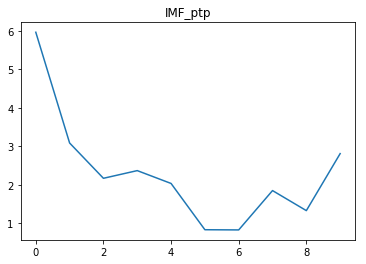

avg 0.6813225496105152
sum 6.813225496105152


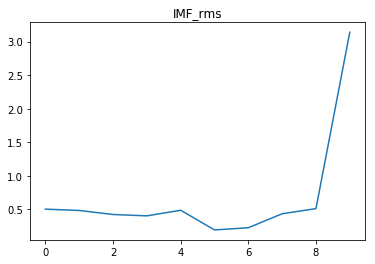

avg 6.65
sum 66.5


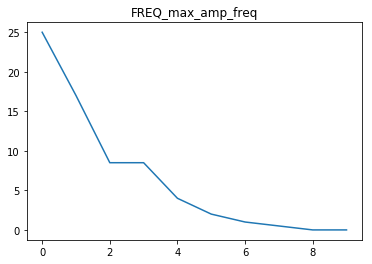

avg 0.014196494816293509
sum 0.1419649481629351


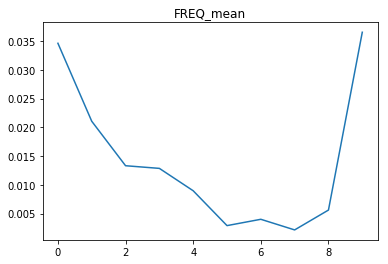

avg 0.052777681725758606
sum 0.5277768172575861


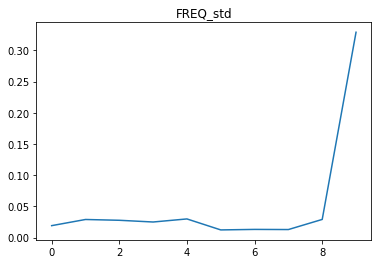

avg 0.018655061762731805
sum 0.18655061762731806


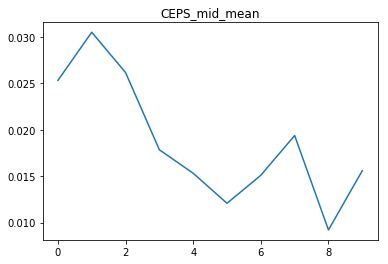

avg 0.014362606468821672
sum 0.14362606468821673


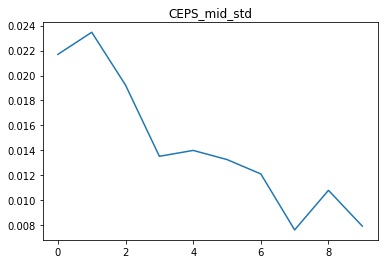

avg 85.5
sum 855


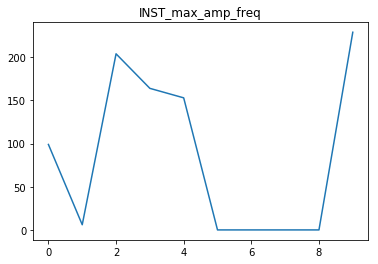

avg 65.9
sum 659


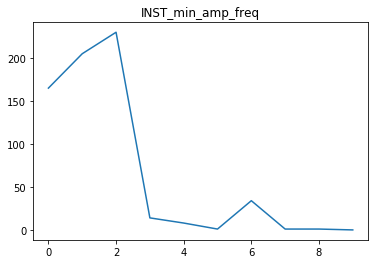

avg 0.2909890457686087
sum 2.9098904576860867


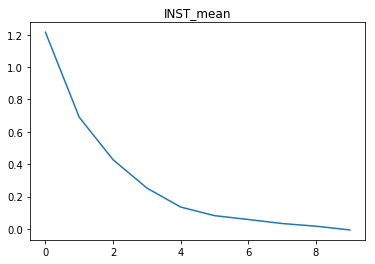

avg 0.21086020269156291
sum 2.108602026915629


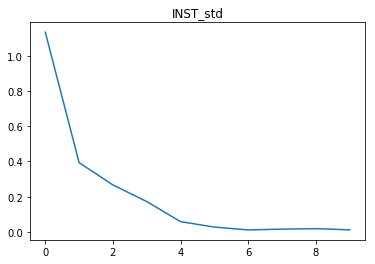

In [71]:
detail_plot_by_group(group_ht, 1102)


avg 2.0771826099759743
sum 20.771826099759743


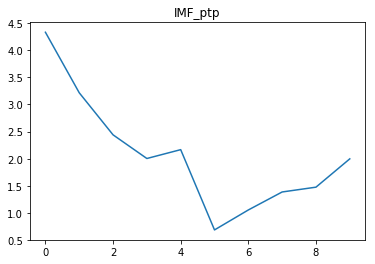

avg 0.6229878650816993
sum 6.229878650816993


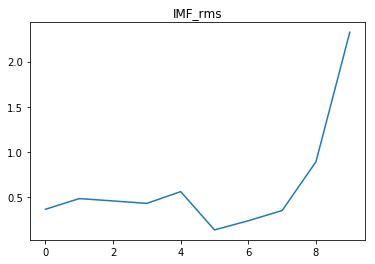

avg 6.55
sum 65.5


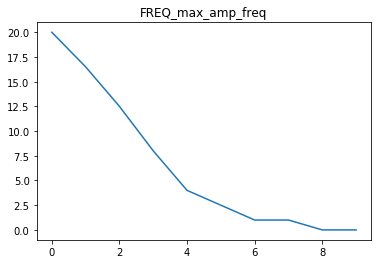

avg 0.011864717463765858
sum 0.11864717463765857


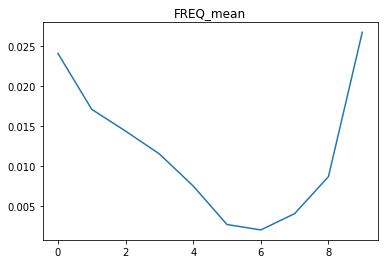

avg 0.04878621541539195
sum 0.48786215415391954


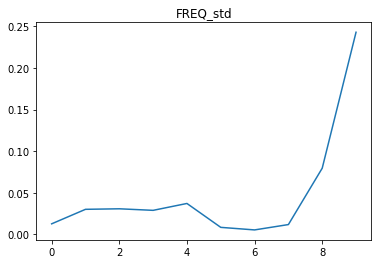

avg 0.018929194680989456
sum 0.18929194680989456


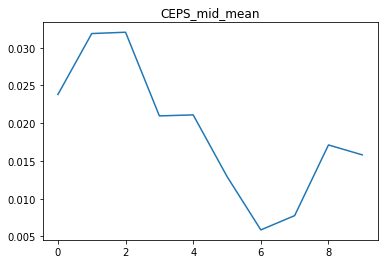

avg 0.015613533184957692
sum 0.15613533184957692


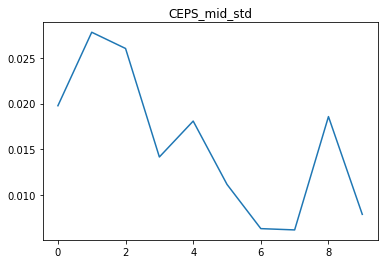

avg 71.4
sum 714


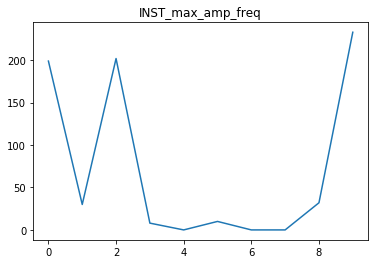

avg 27.6
sum 276


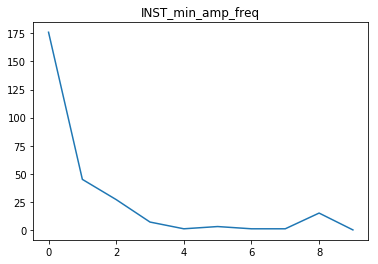

avg 0.2849939566489481
sum 2.849939566489481


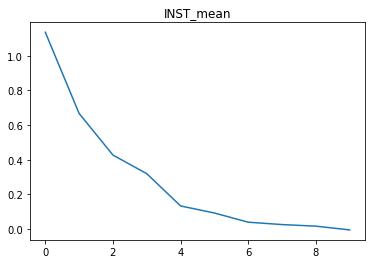

avg 0.20897754890976325
sum 2.0897754890976326


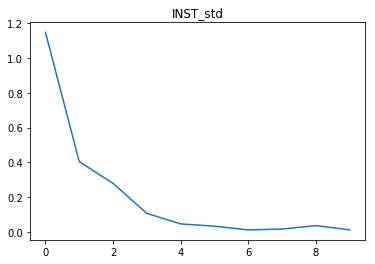

In [72]:
detail_plot_by_group(group_ht, 1104)


avg 1.970057523188191
sum 19.70057523188191


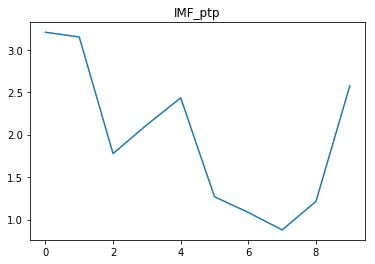

avg 0.6614220909355688
sum 6.614220909355688


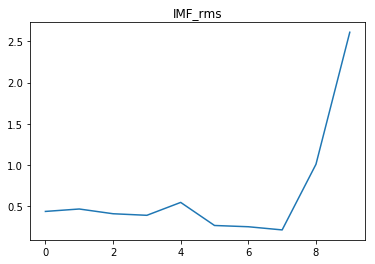

avg 6.65
sum 66.5


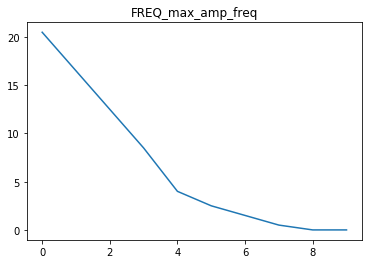

avg 0.012228609224706841
sum 0.12228609224706842


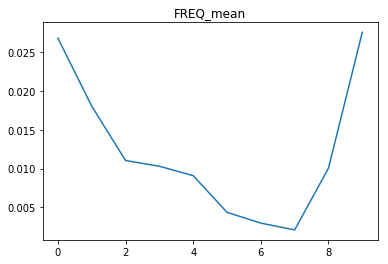

avg 0.05338436895687635
sum 0.5338436895687635


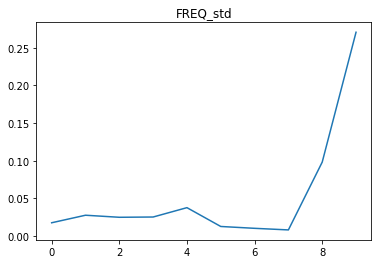

avg 0.021560255260817042
sum 0.2156025526081704


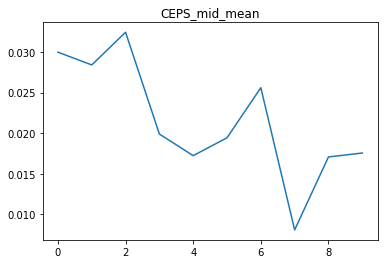

avg 0.015533006813633742
sum 0.15533006813633743


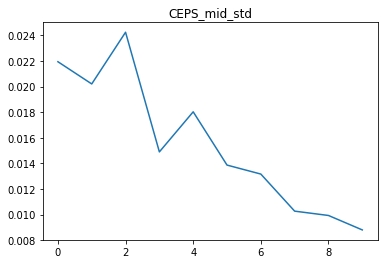

avg 87.6
sum 876


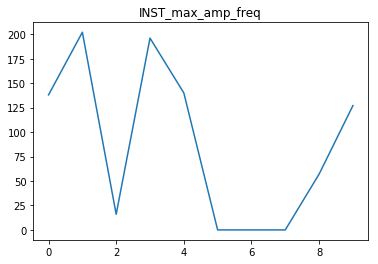

avg 71.7
sum 717


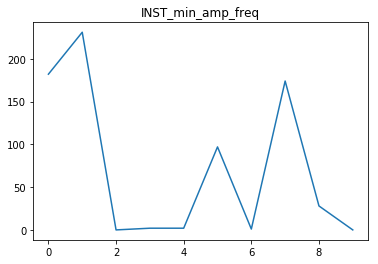

avg 0.24682235079917625
sum 2.4682235079917625


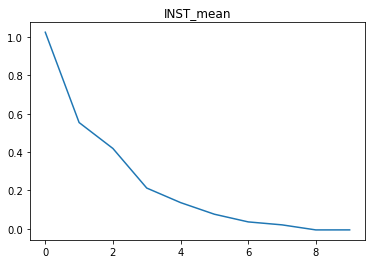

avg 0.21643086209928158
sum 2.164308620992816


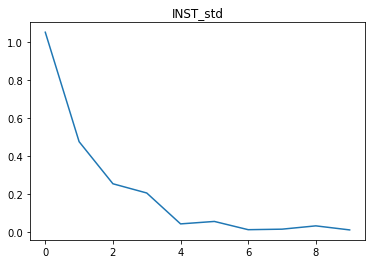

In [73]:
detail_plot_by_group(group_ht, 1106)


avg 1.906756864412013
sum 19.06756864412013


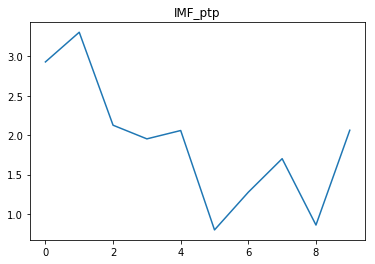

avg 0.6323177800047926
sum 6.323177800047926


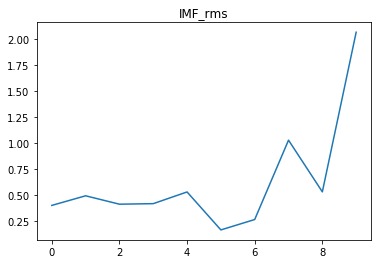

avg 7.0
sum 70.0


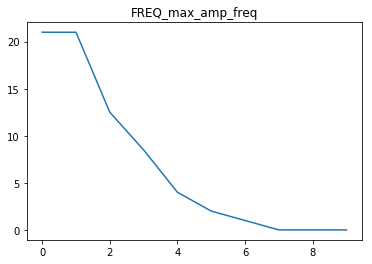

avg 0.012668517292586941
sum 0.12668517292586942


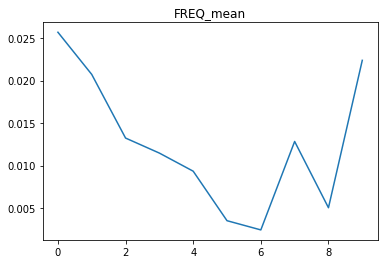

avg 0.05134073677859138
sum 0.5134073677859138


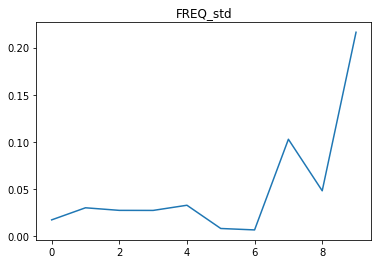

avg 0.018774654848870226
sum 0.18774654848870226


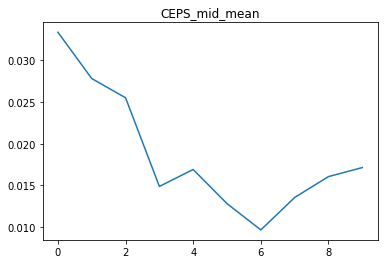

avg 0.013849211472660475
sum 0.13849211472660475


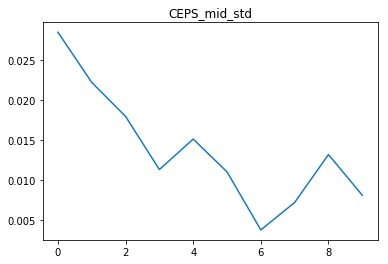

avg 56.2
sum 562


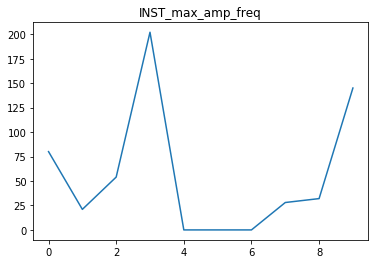

avg 92.0
sum 920


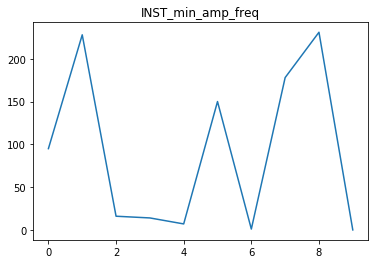

avg 0.26816415908120256
sum 2.6816415908120255


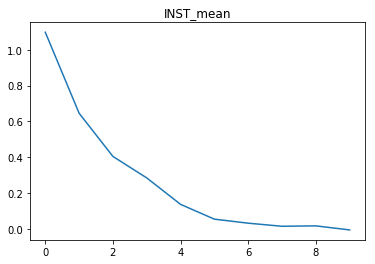

avg 0.2398581818970887
sum 2.398581818970887


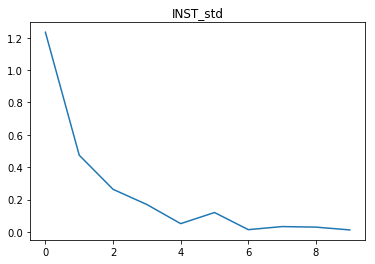

In [74]:
detail_plot_by_group(group_ht, 1108)


avg 2.2026789757221445
sum 22.026789757221447


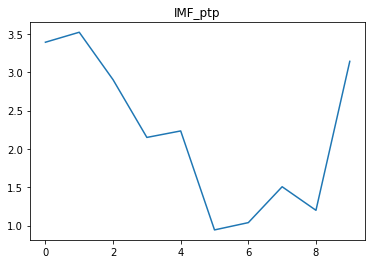

avg 0.7535075413742227
sum 7.535075413742227


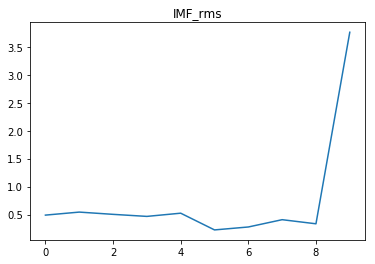

avg 6.6
sum 66.0


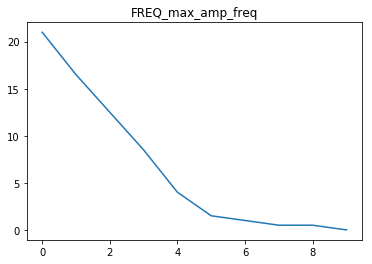

avg 0.014863427346025207
sum 0.14863427346025207


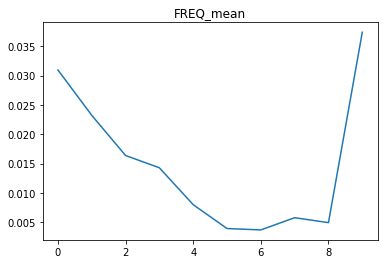

avg 0.05944761511270478
sum 0.5944761511270478


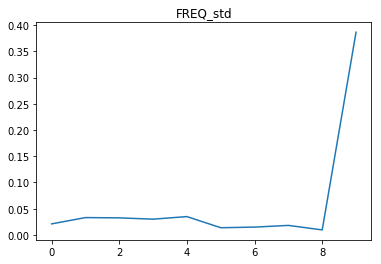

avg 0.01812082616138628
sum 0.1812082616138628


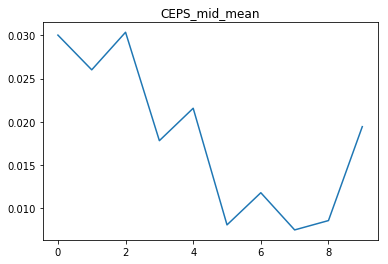

avg 0.014409801669925379
sum 0.1440980166992538


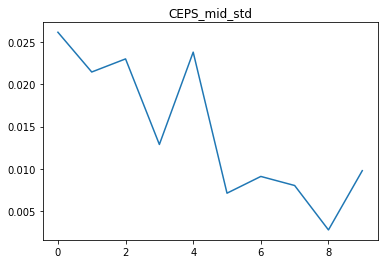

avg 44.9
sum 449


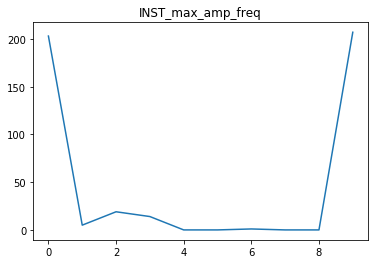

avg 40.8
sum 408


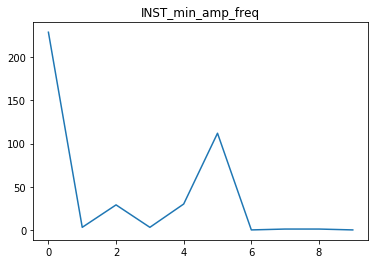

avg 0.27211507233396504
sum 2.7211507233396506


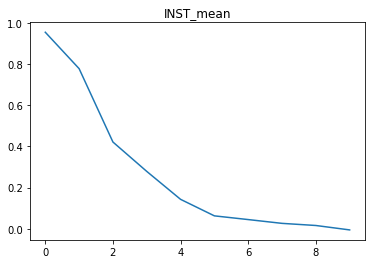

avg 0.21628722562048538
sum 2.162872256204854


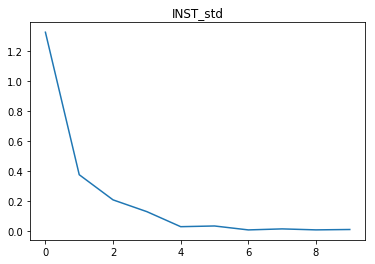

In [75]:
detail_plot_by_group(group_ht, 1112)


avg 2.2375445125194107
sum 22.37544512519411


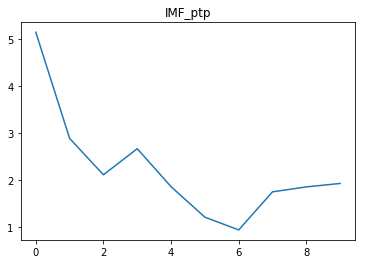

avg 0.6731137475903424
sum 6.731137475903424


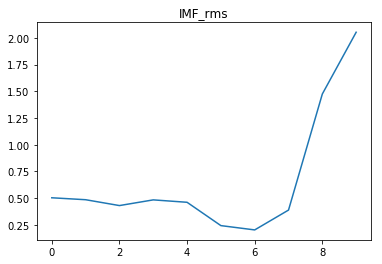

avg 6.65
sum 66.5


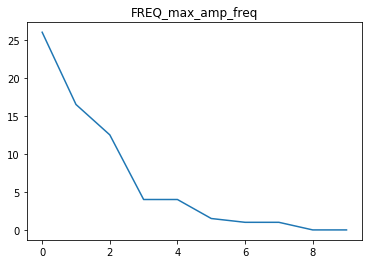

avg 0.013271768082778166
sum 0.13271768082778165


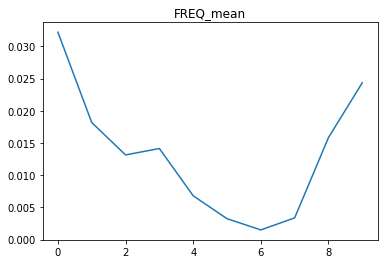

avg 0.052928662517089206
sum 0.5292866251708921


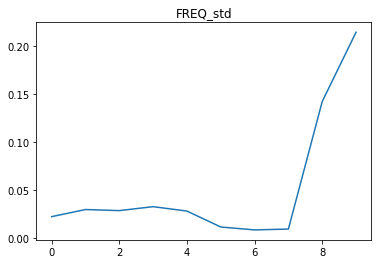

avg 0.01889482881275737
sum 0.18894828812757372


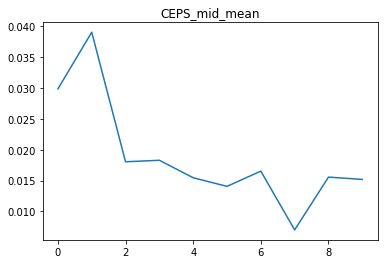

avg 0.015715967581510087
sum 0.15715967581510087


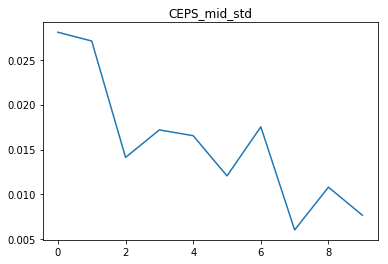

avg 76.4
sum 764


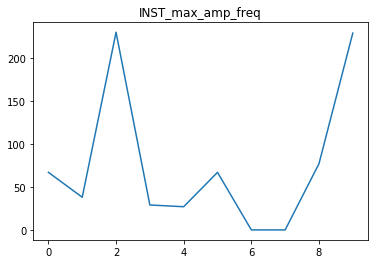

avg 54.3
sum 543


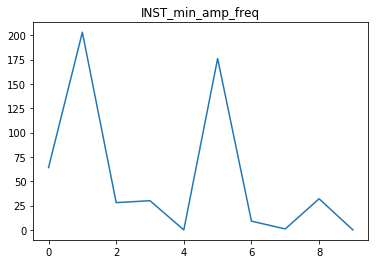

avg 0.27897824749868605
sum 2.7897824749868607


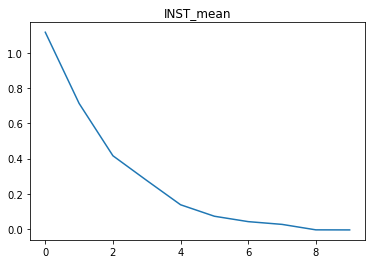

avg 0.22107329975202136
sum 2.2107329975202137


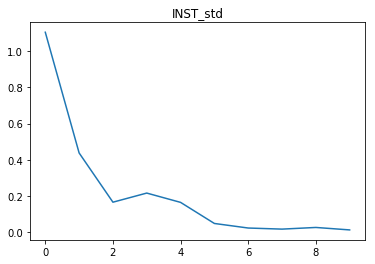

In [76]:
detail_plot_by_group(group_ht, 1115)


avg 1.7337847549032297
sum 19.071632303935527


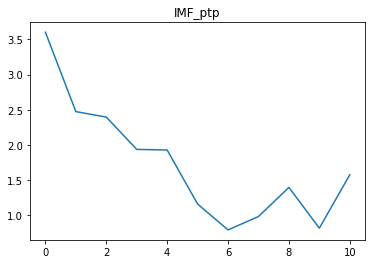

avg 0.5566860626890934
sum 6.123546689580027


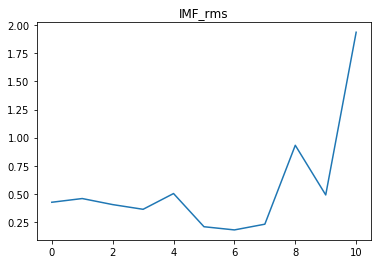

avg 6.318181818181818
sum 69.5


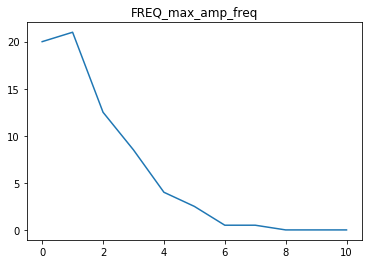

avg 0.011120054915488757
sum 0.12232060407037632


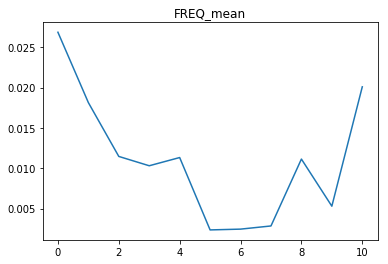

avg 0.043302820829382145
sum 0.4763310291232036


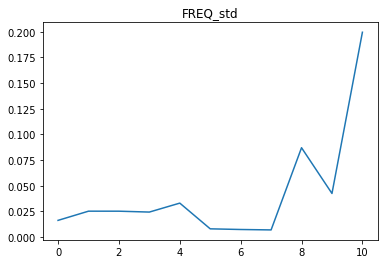

avg 0.017604855457082826
sum 0.1936534100279111


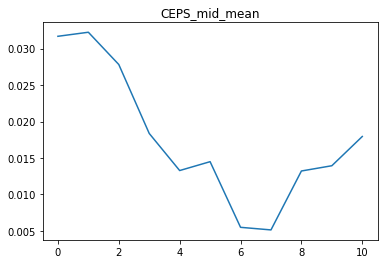

avg 0.015091403689058914
sum 0.16600544057964806


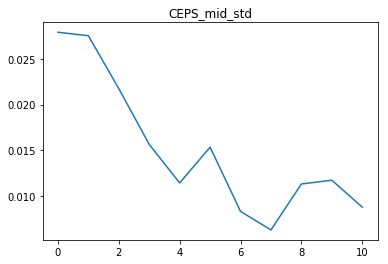

avg 70.27272727272727
sum 773


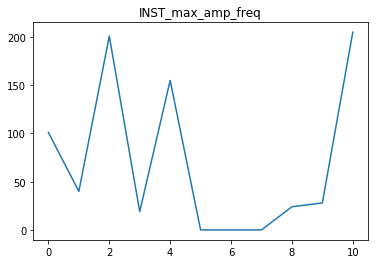

avg 69.18181818181819
sum 761


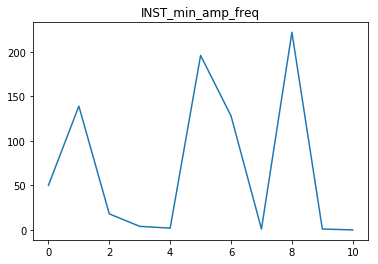

avg 0.24610878187309296
sum 2.7071966006040227


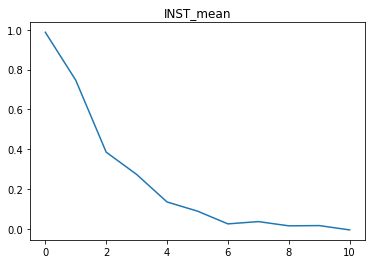

avg 0.20405008596022015
sum 2.2445509455624215


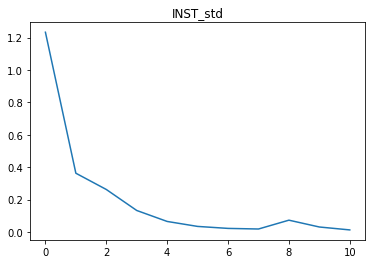

In [78]:
detail_plot_by_group(group_ht, 1116)


avg 2.1305191546175832
sum 21.305191546175834


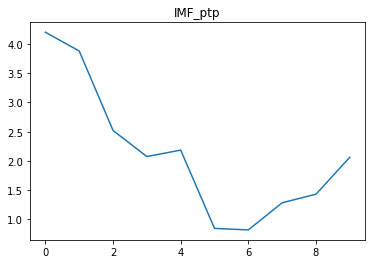

avg 0.6278456224832348
sum 6.2784562248323486


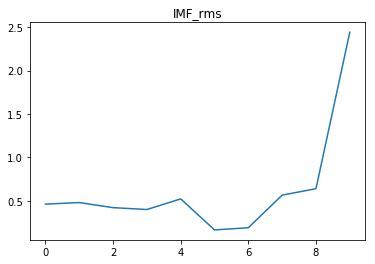

avg 7.0
sum 70.0


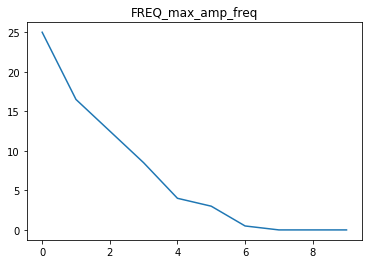

avg 0.01277129441936351
sum 0.1277129441936351


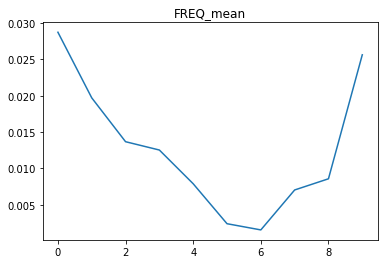

avg 0.05134395242384556
sum 0.5134395242384556


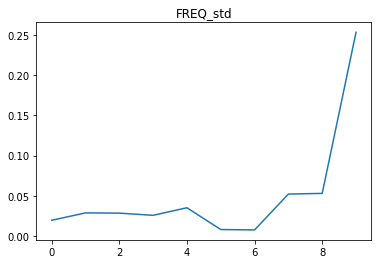

avg 0.019831036879713694
sum 0.19831036879713693


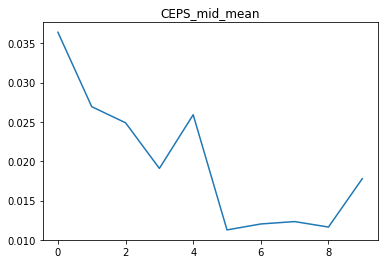

avg 0.01617587569807779
sum 0.16175875698077788


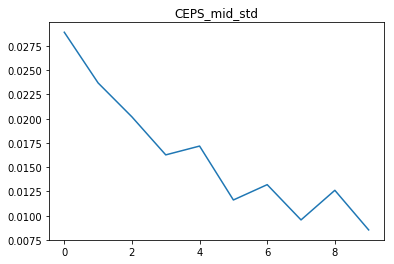

avg 101.5
sum 1015


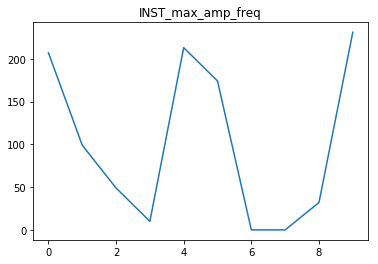

avg 66.0
sum 660


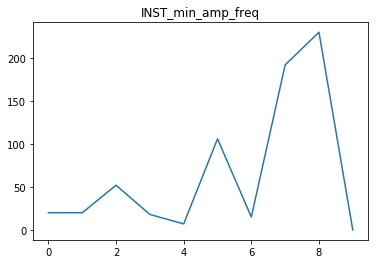

avg 0.2676181437846564
sum 2.676181437846564


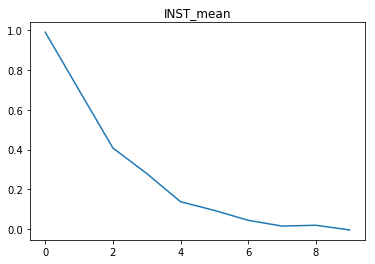

avg 0.23427550759748156
sum 2.3427550759748157


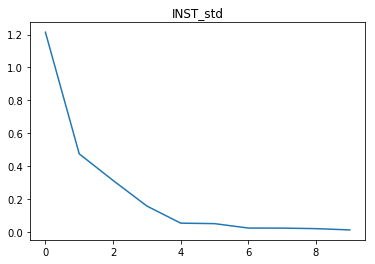

In [79]:
detail_plot_by_group(group_ht, 1117)


avg 2.008169961146469
sum 20.081699611464693


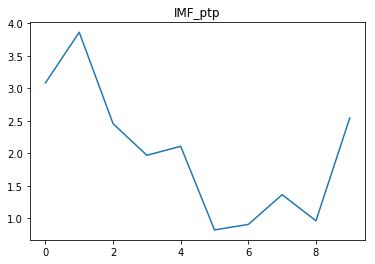

avg 0.6460290874085391
sum 6.460290874085391


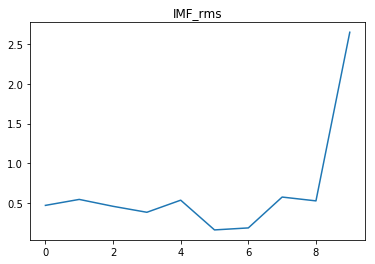

avg 6.3
sum 63.0


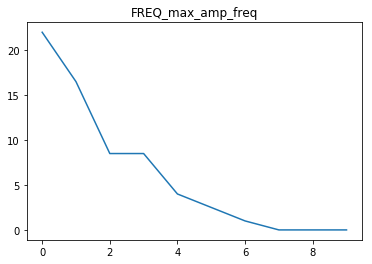

avg 0.012965579504648916
sum 0.12965579504648916


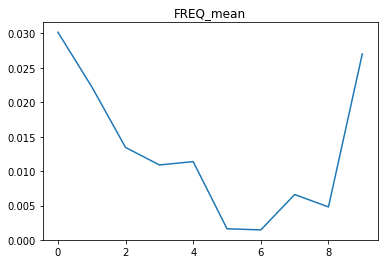

avg 0.053201855459445634
sum 0.5320185545944563


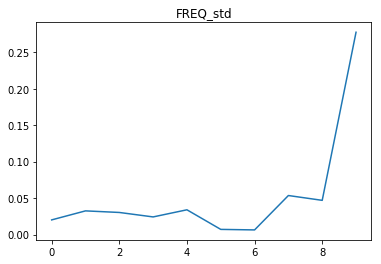

avg 0.02070961888045118
sum 0.2070961888045118


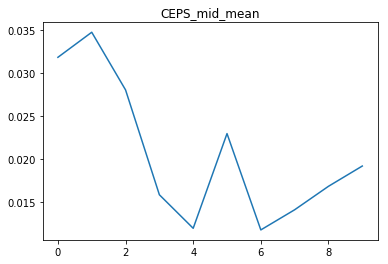

avg 0.01686286598244735
sum 0.1686286598244735


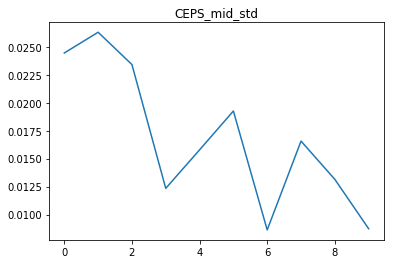

avg 73.1
sum 731


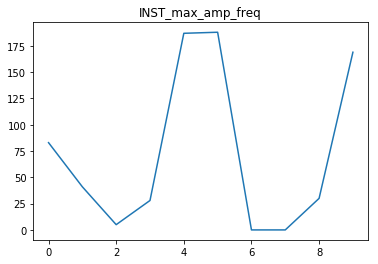

avg 77.4
sum 774


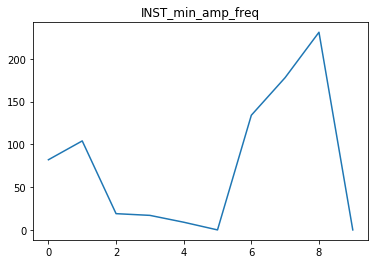

avg 0.2675173739992023
sum 2.675173739992023


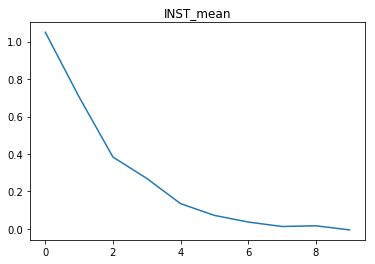

avg 0.22136802198739308
sum 2.2136802198739307


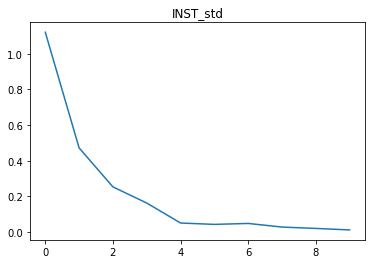

In [80]:
detail_plot_by_group(group_ht, 1118)


In [21]:
def quick_look(group_ht, g):
    gt = group_ht[g]
    for i in range(gt.eIMFs.shape[0]):
        x = gt.eIMFs[i]
        if len(x)<gt.FFT_SIZE:
            continue
        xs = x[-1*gt.FFT_SIZE:]
        gt.eIMF_plot(xs, 10, i)
        gt.freq_spec_plot(gt.freq_spectrum[i])
        gt.power_spec_plot(gt.power_spectrum[i])
        gt.cepstrum_plot(gt.cepstrum[i])  
        gt.instant_freq_plot(gt.instant_freqs[i], i)

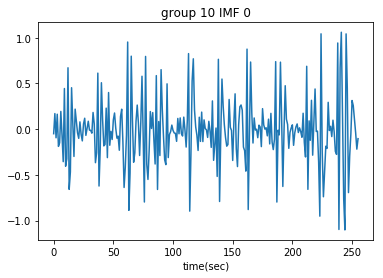

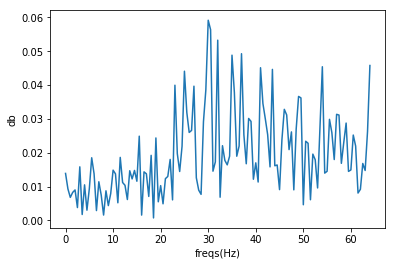

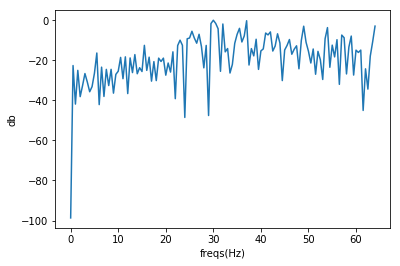

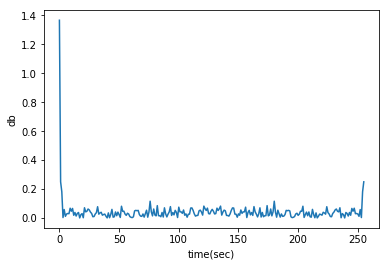

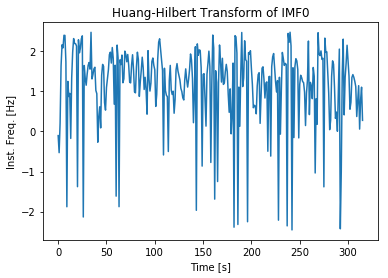

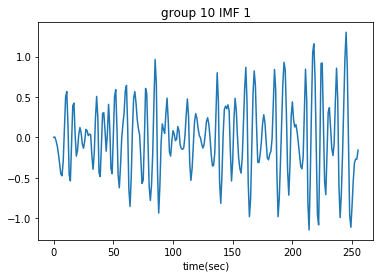

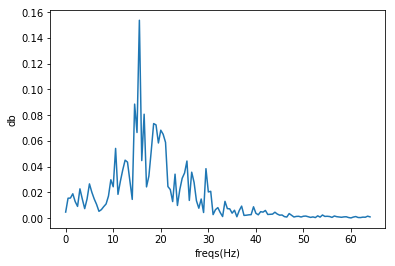

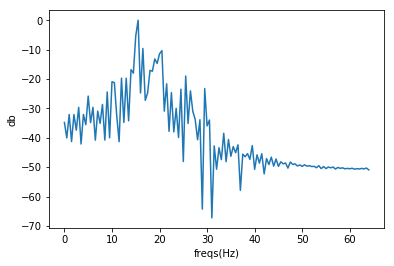

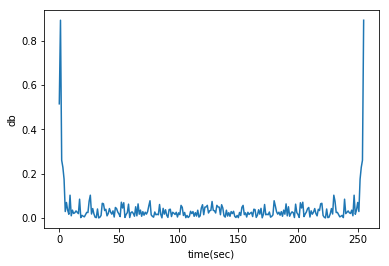

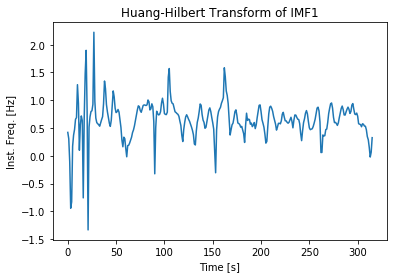

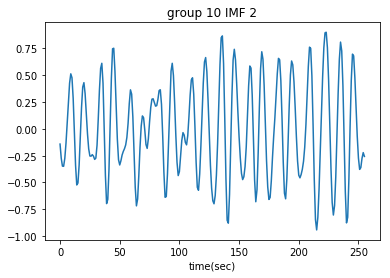

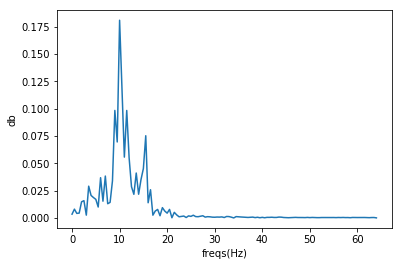

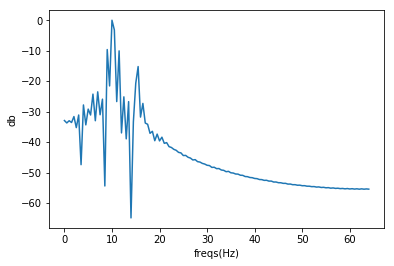

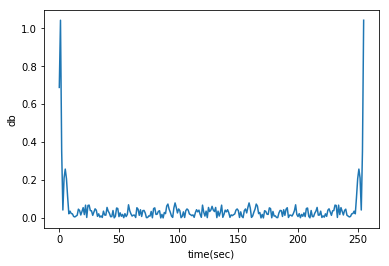

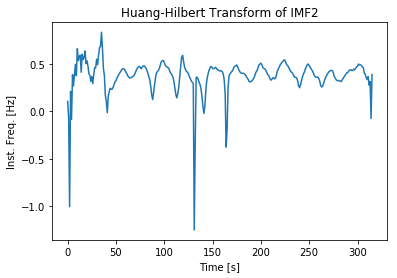

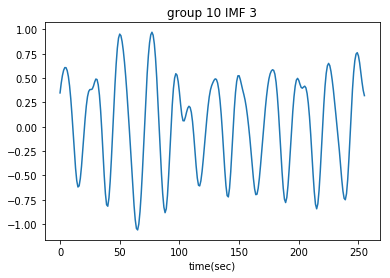

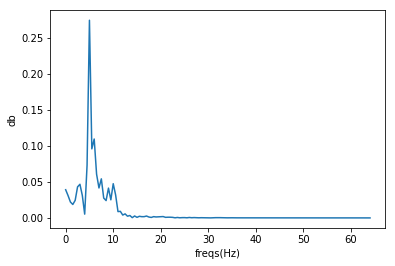

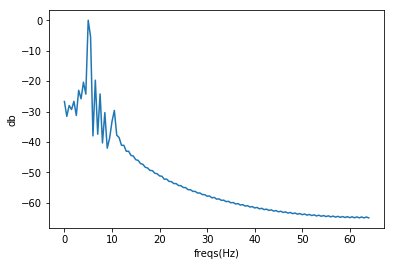

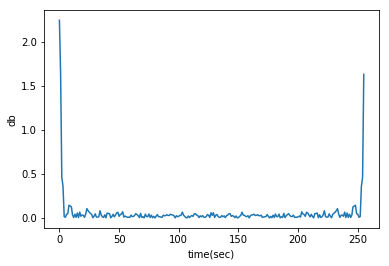

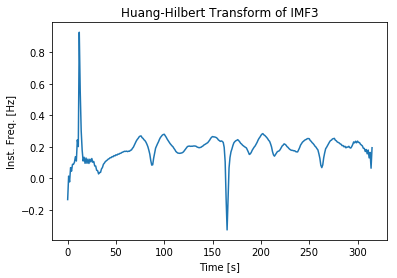

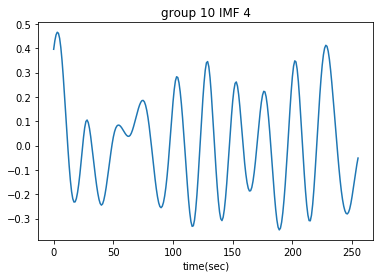

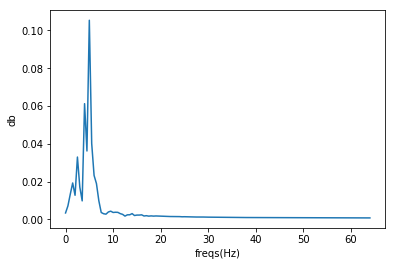

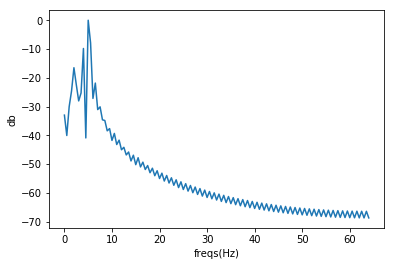

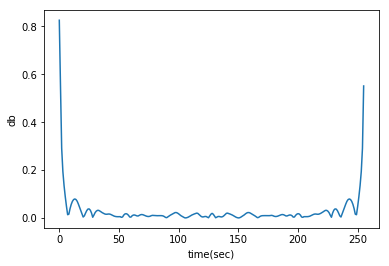

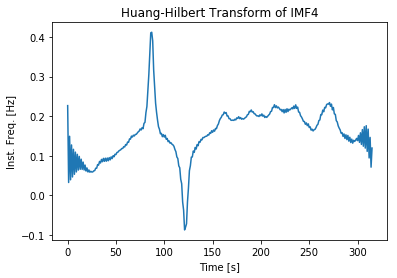

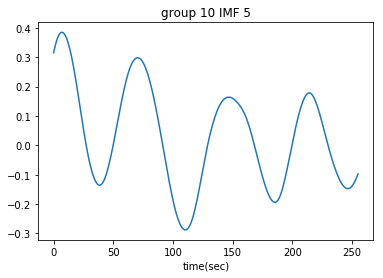

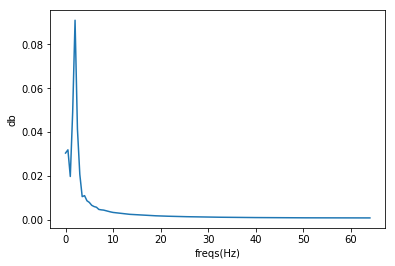

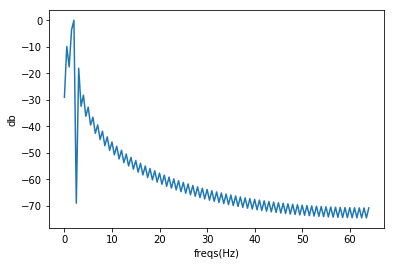

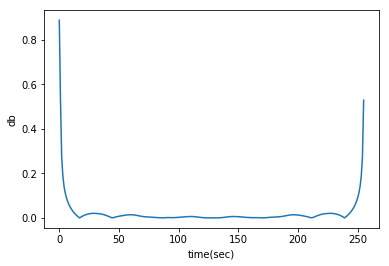

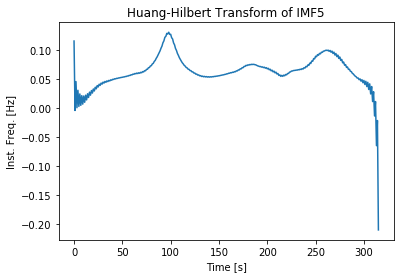

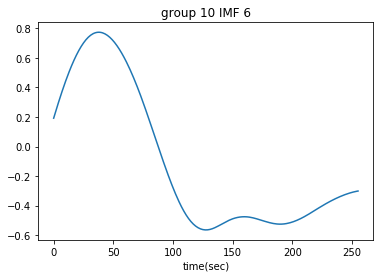

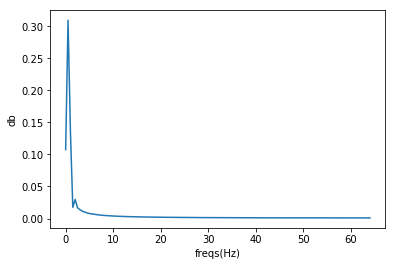

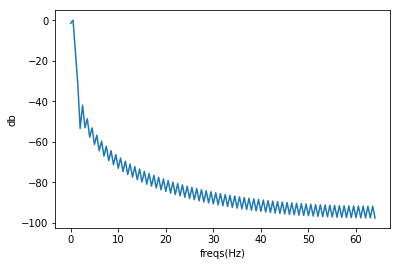

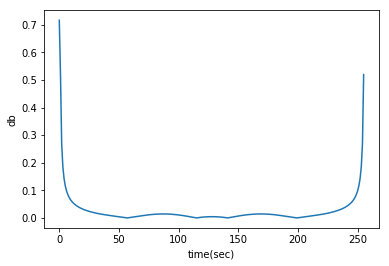

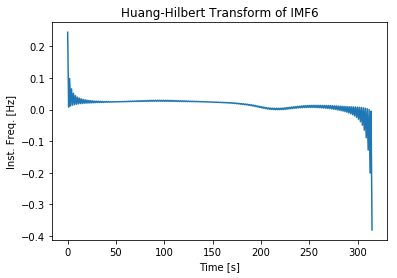

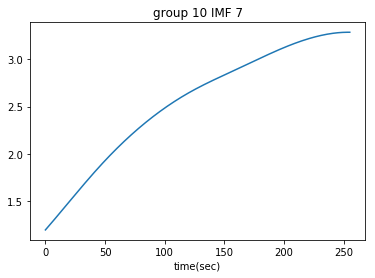

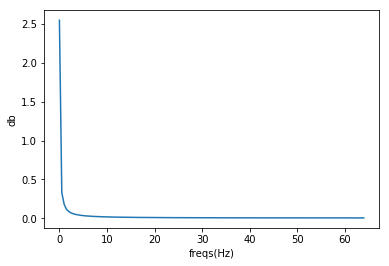

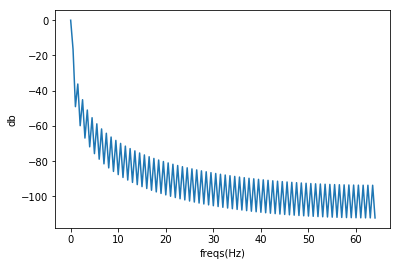

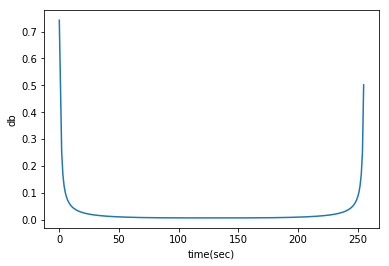

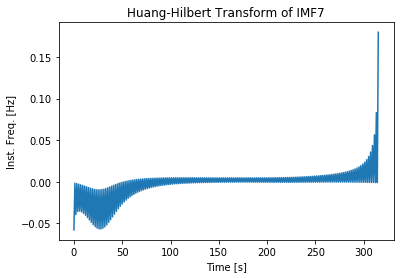

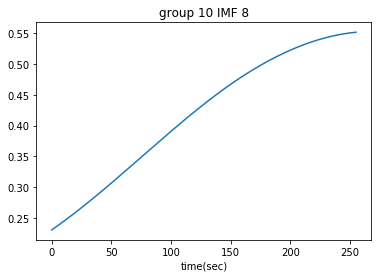

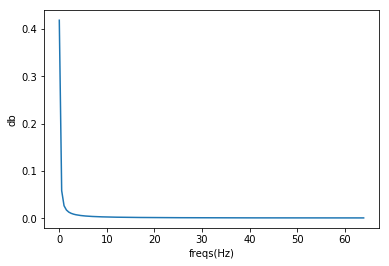

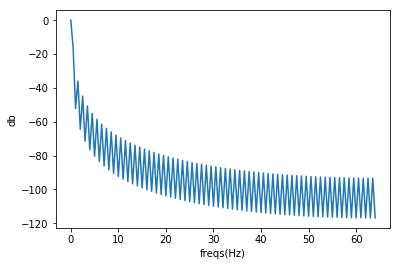

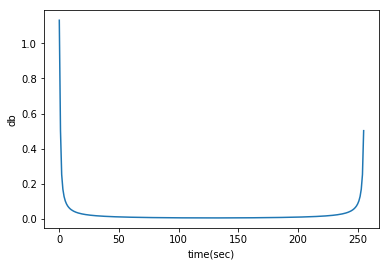

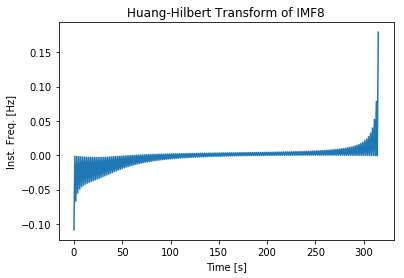

In [22]:
quick_look(group_ht, 10)

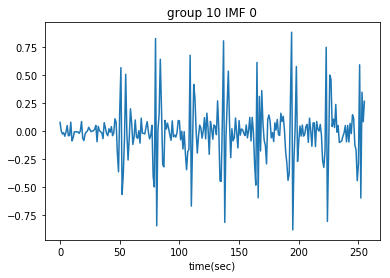

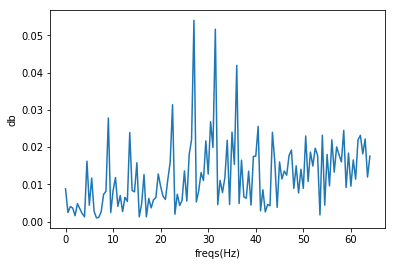

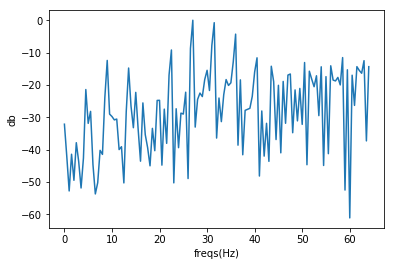

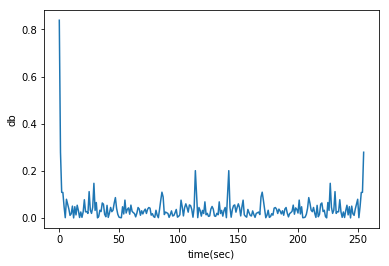

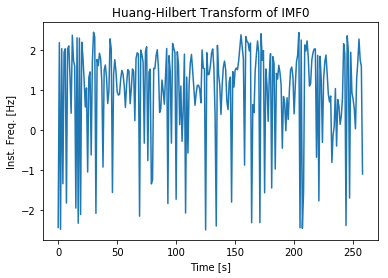

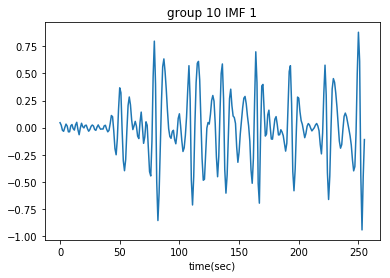

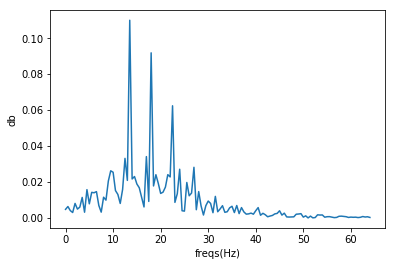

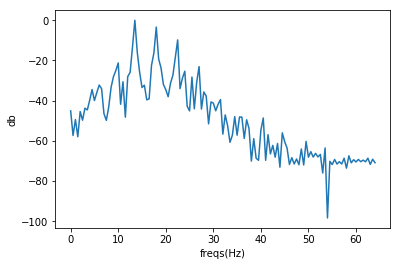

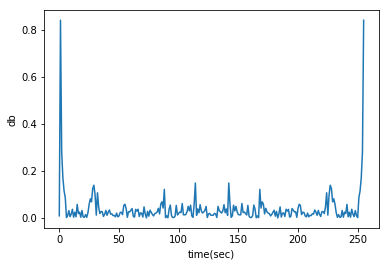

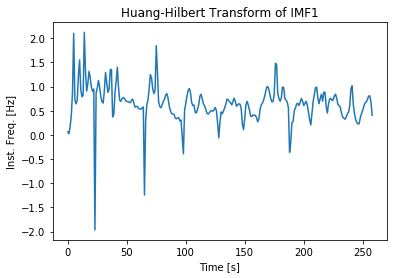

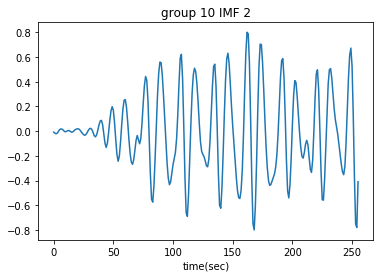

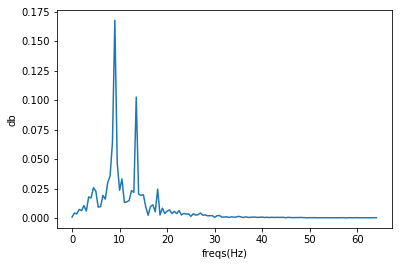

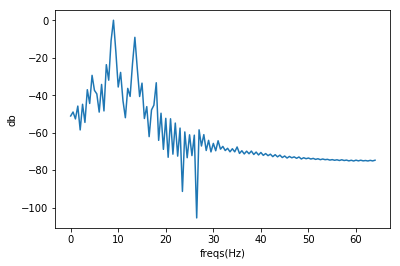

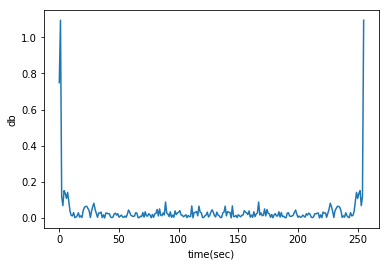

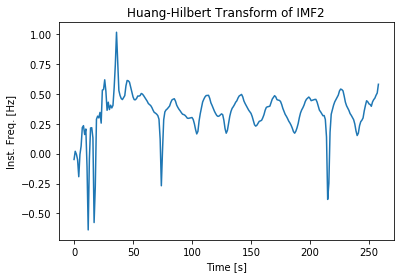

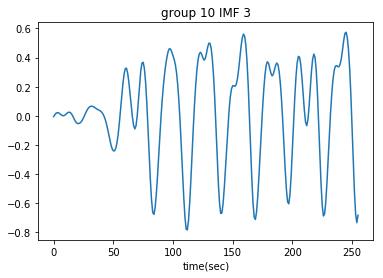

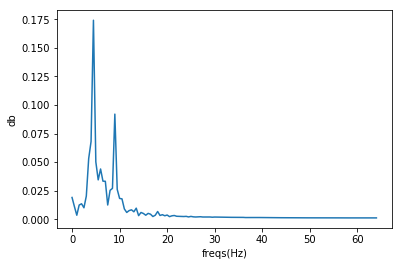

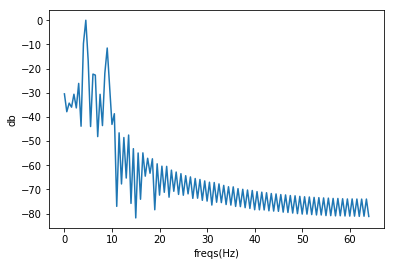

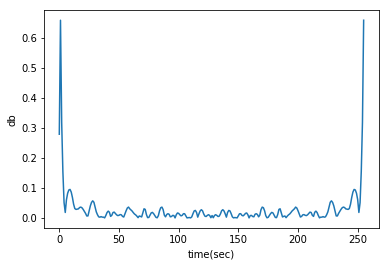

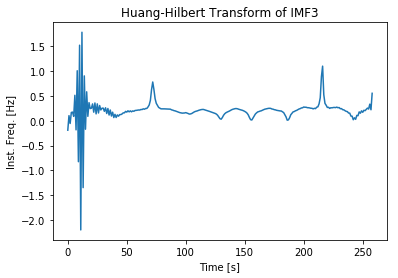

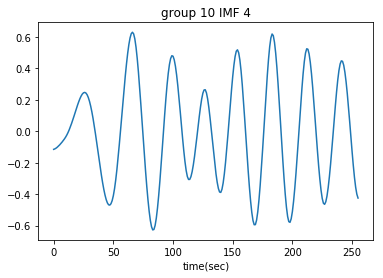

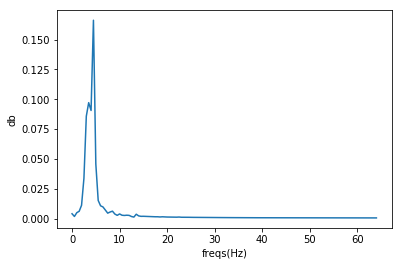

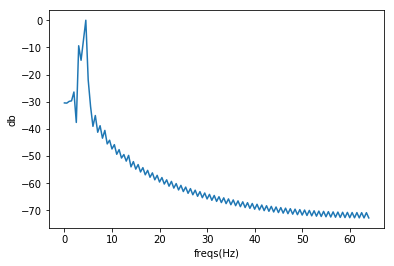

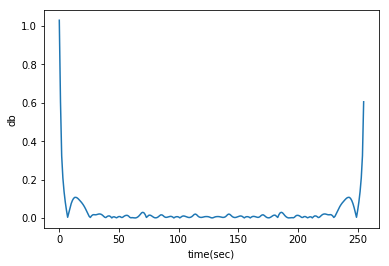

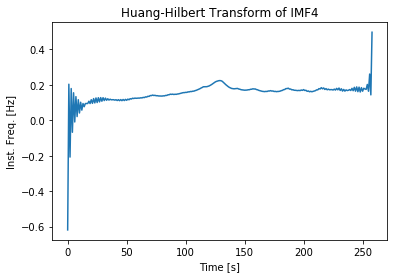

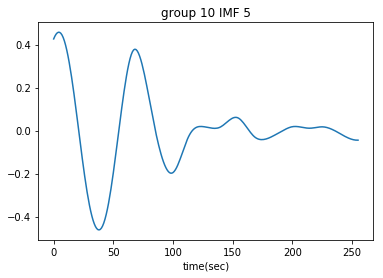

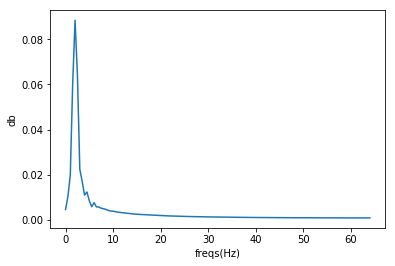

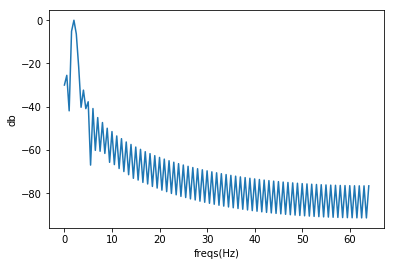

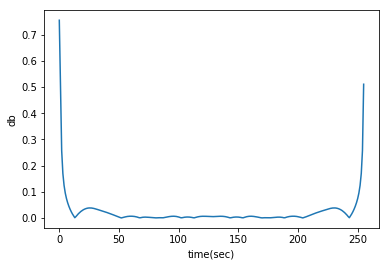

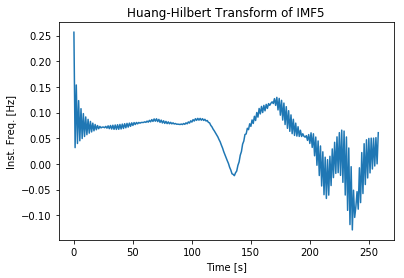

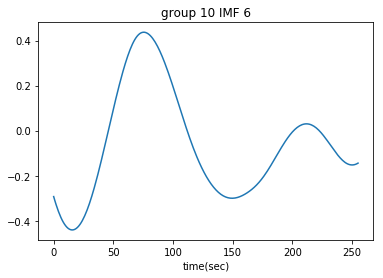

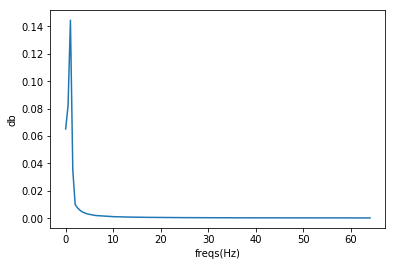

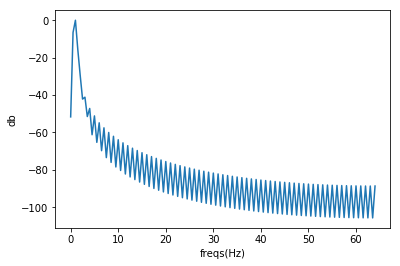

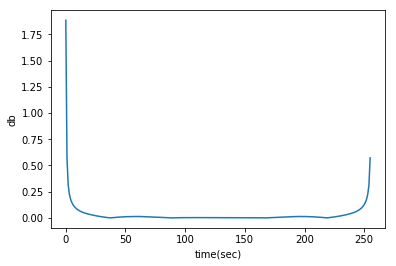

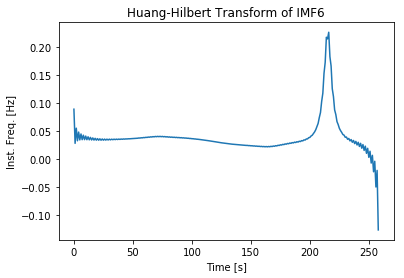

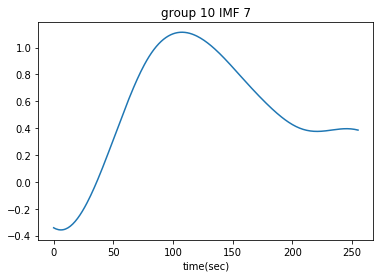

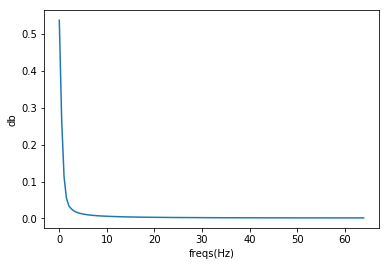

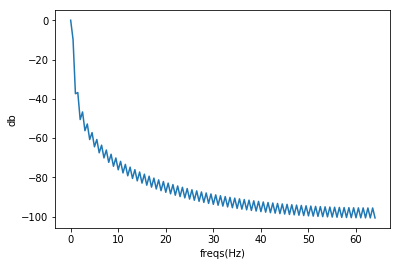

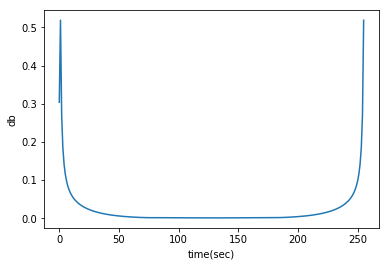

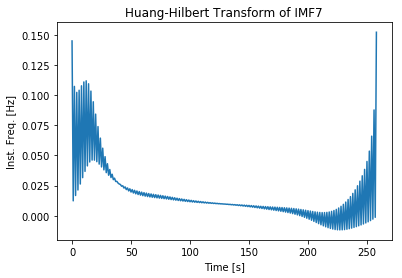

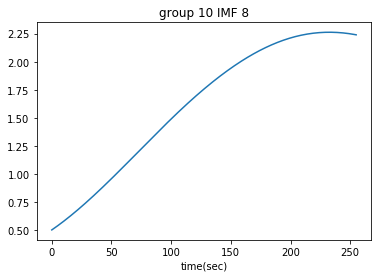

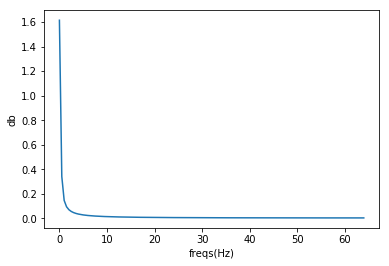

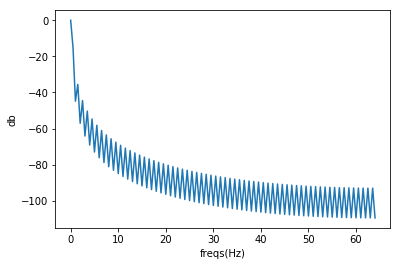

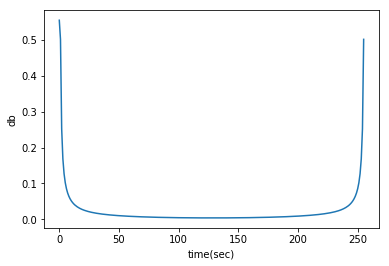

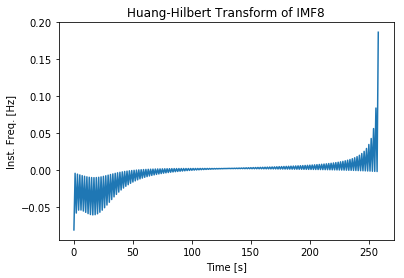

In [23]:
quick_look(group_ht, 500)

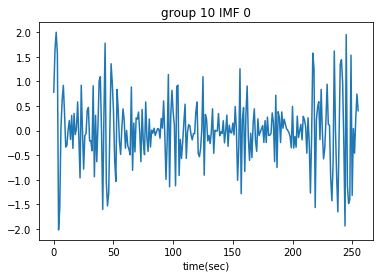

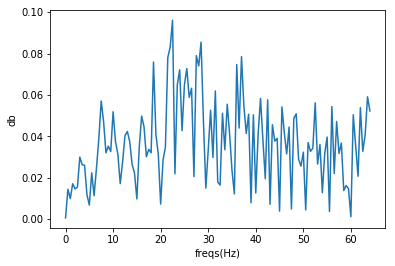

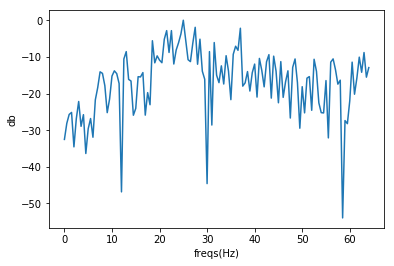

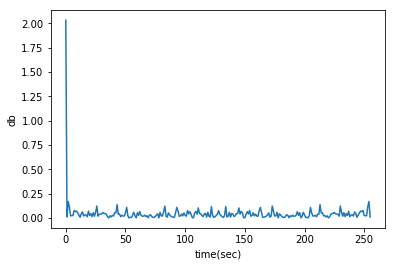

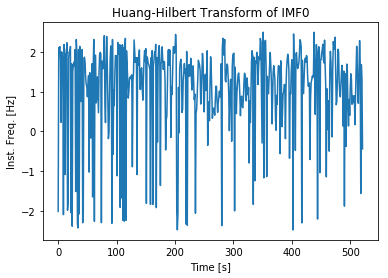

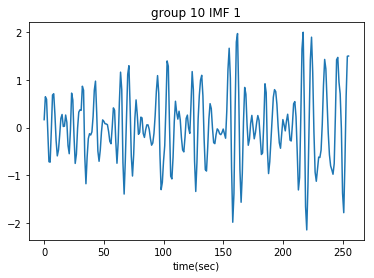

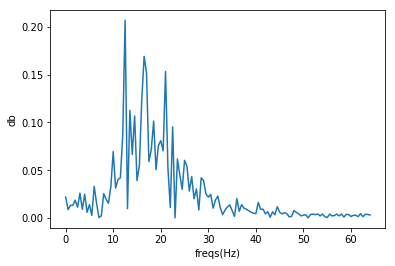

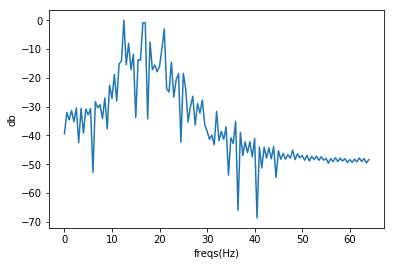

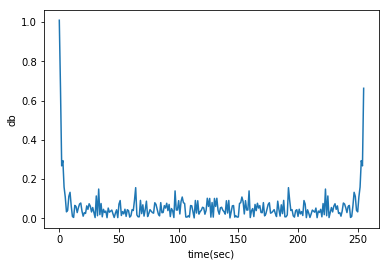

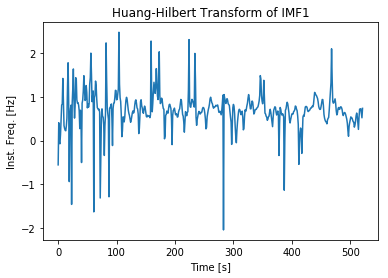

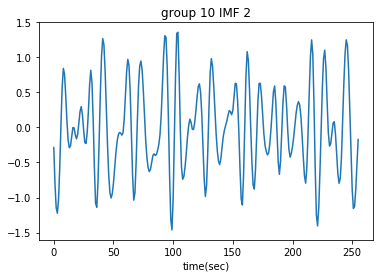

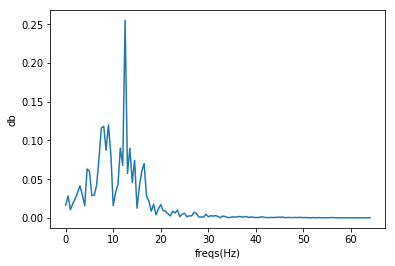

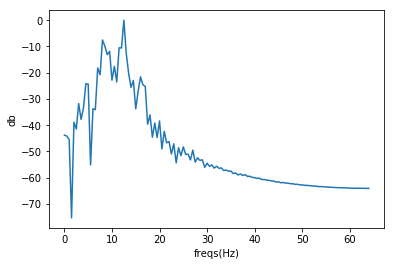

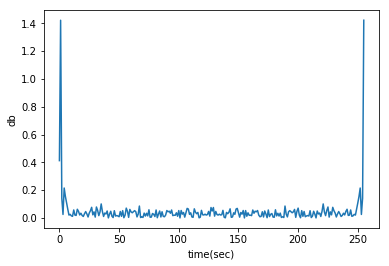

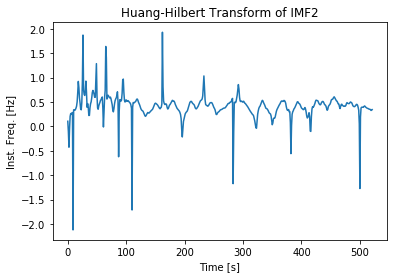

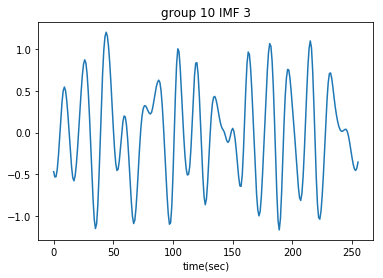

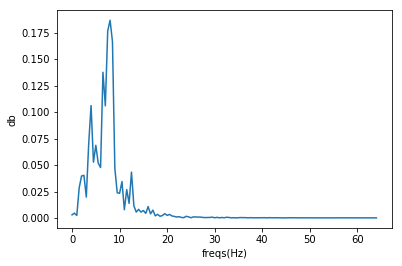

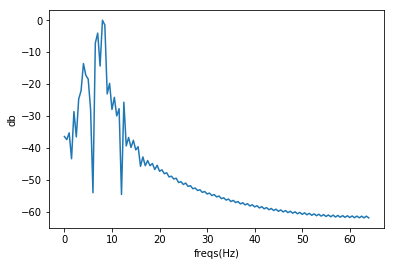

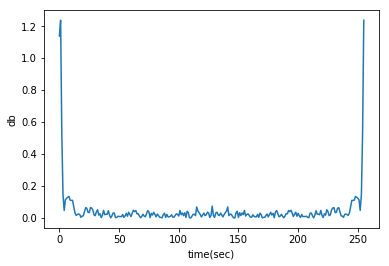

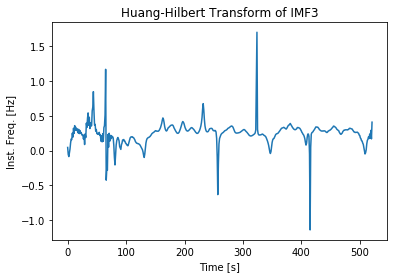

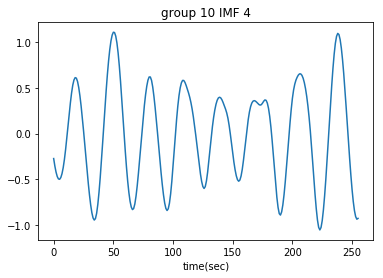

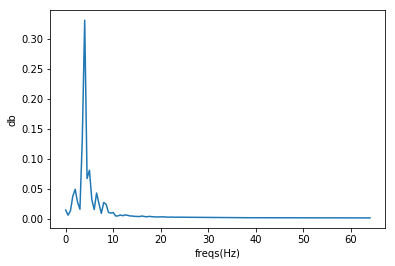

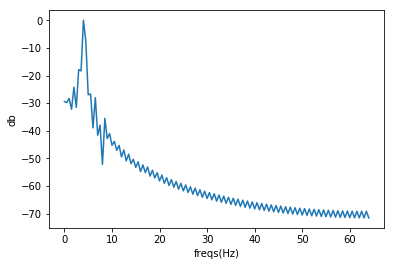

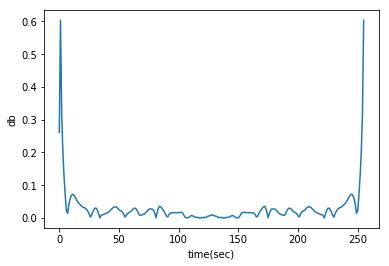

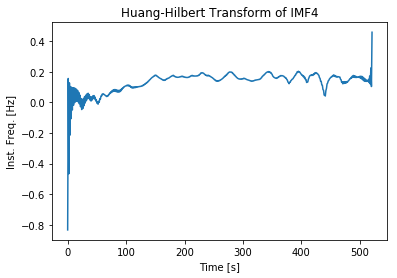

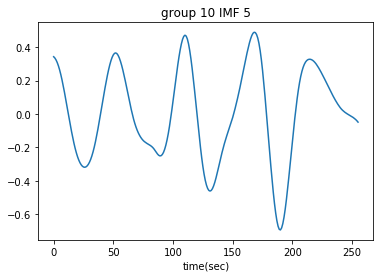

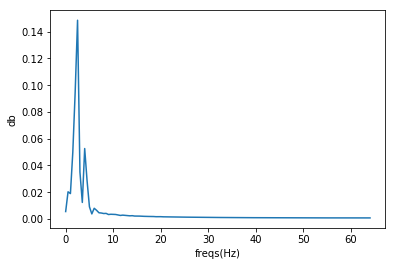

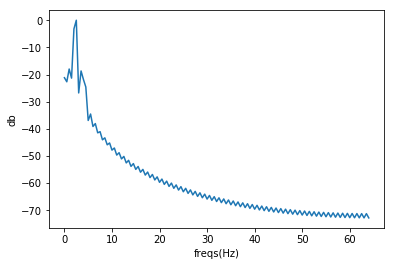

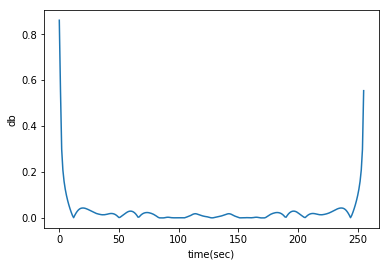

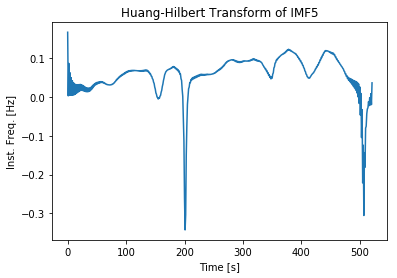

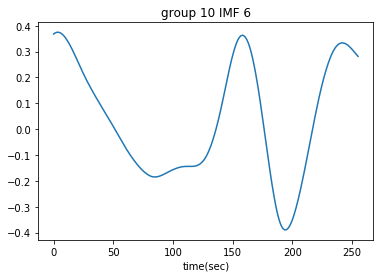

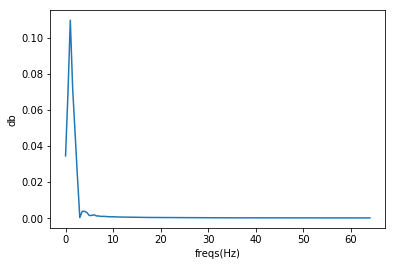

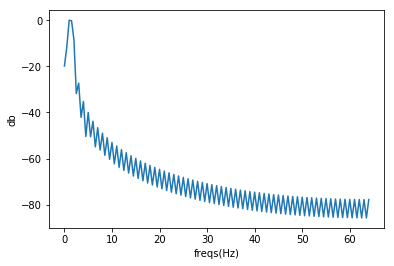

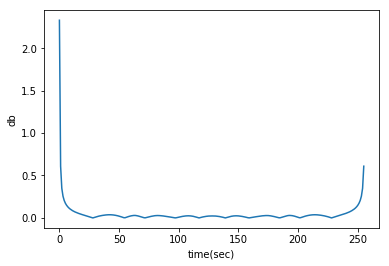

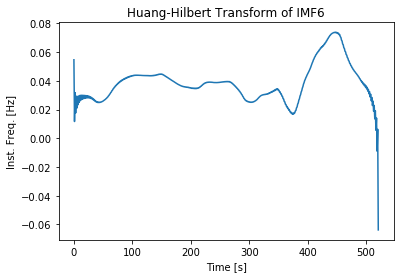

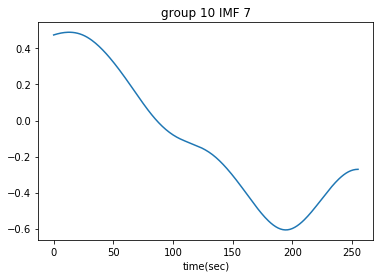

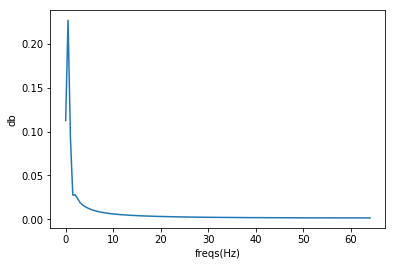

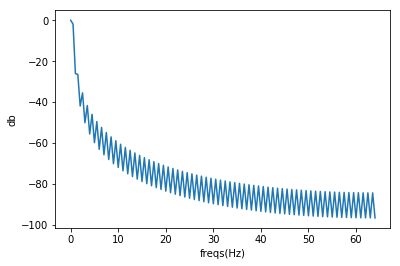

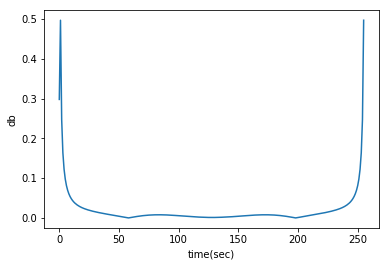

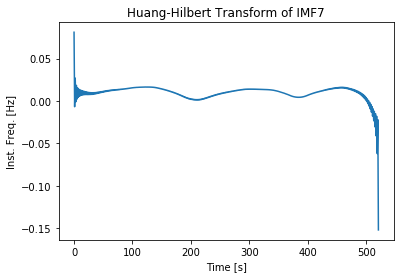

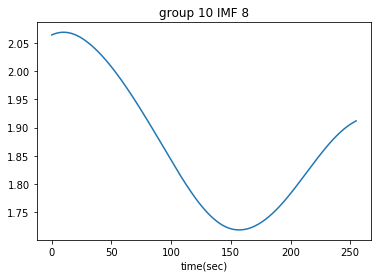

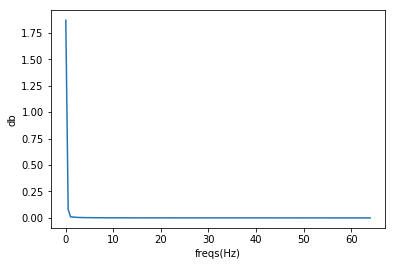

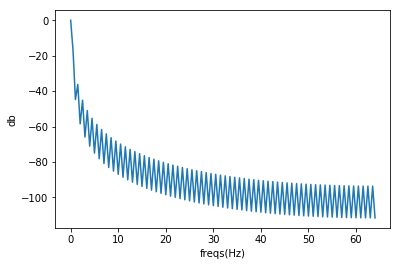

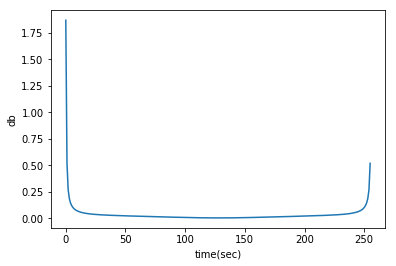

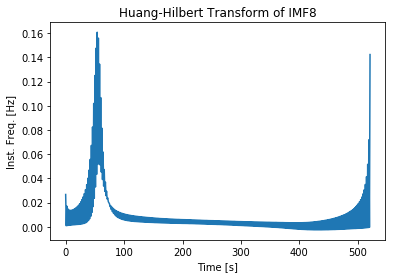

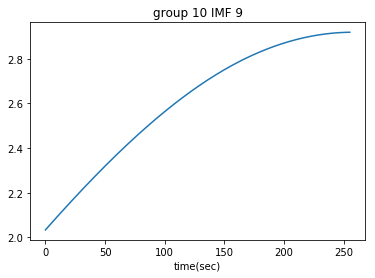

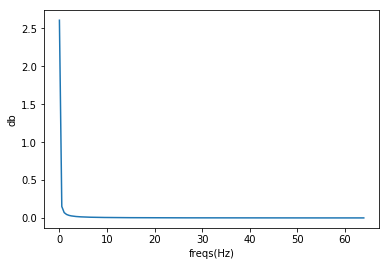

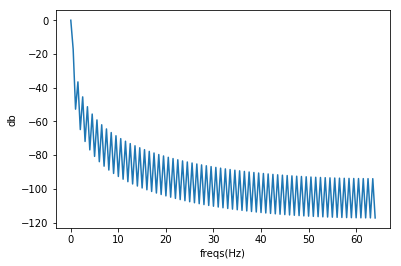

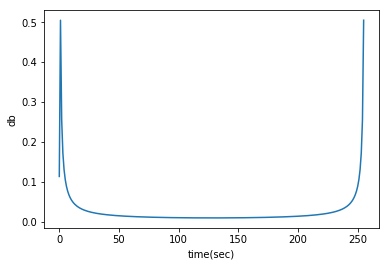

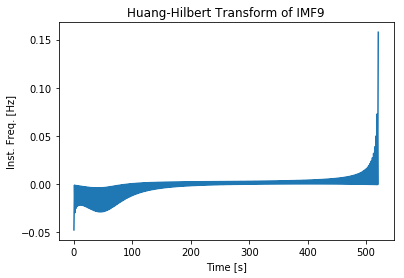

In [24]:
quick_look(group_ht, 1000)

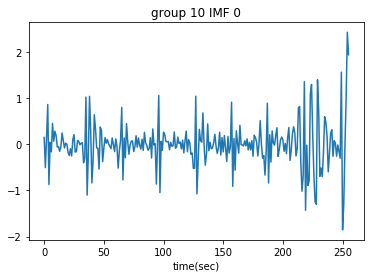

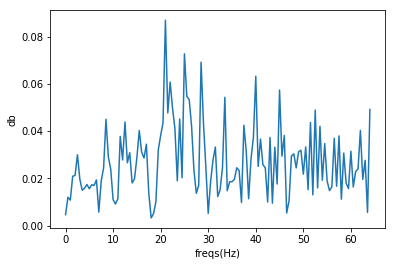

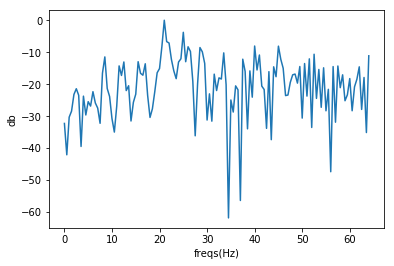

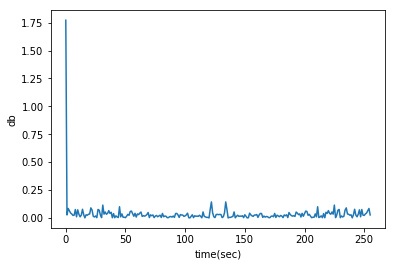

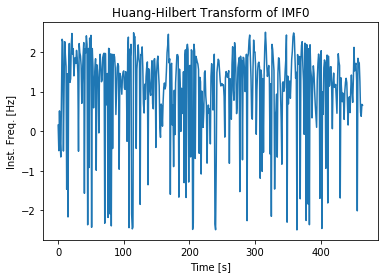

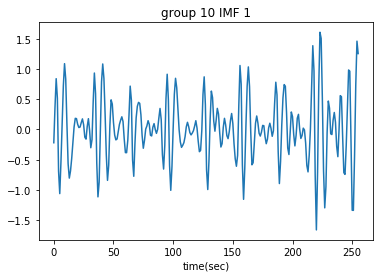

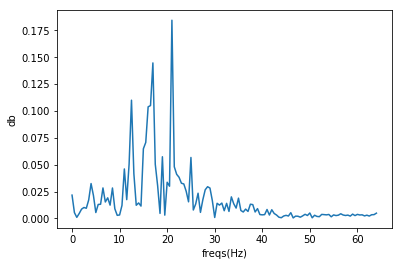

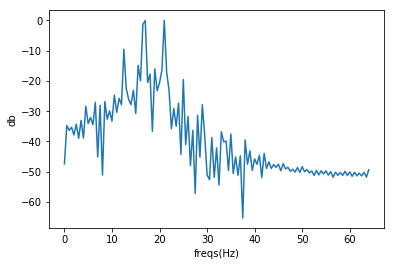

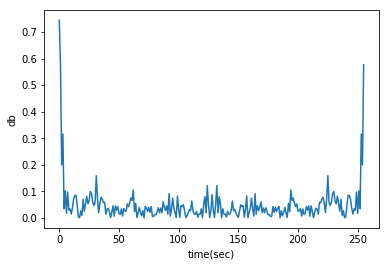

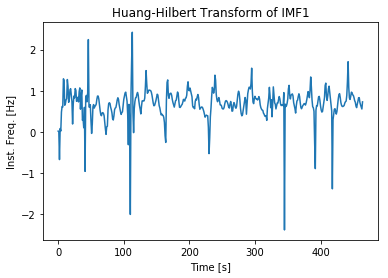

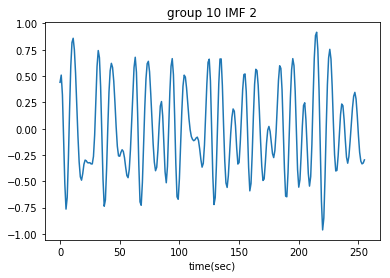

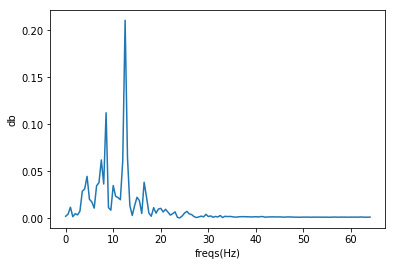

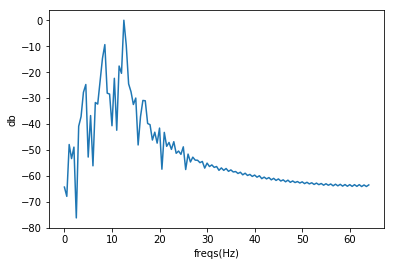

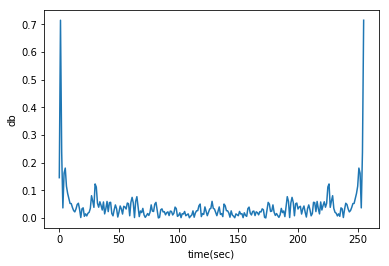

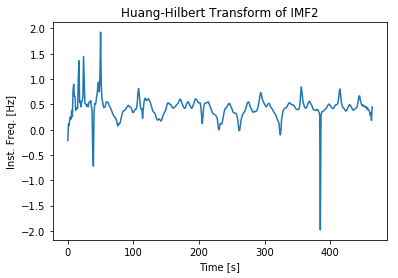

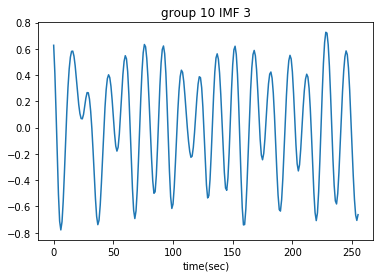

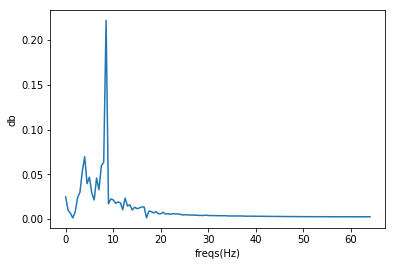

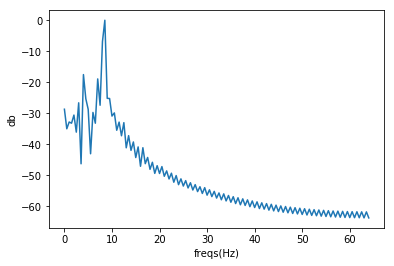

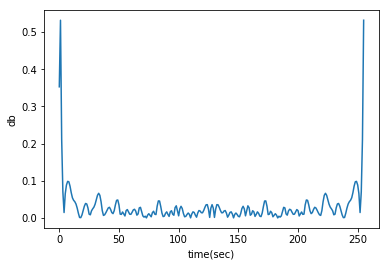

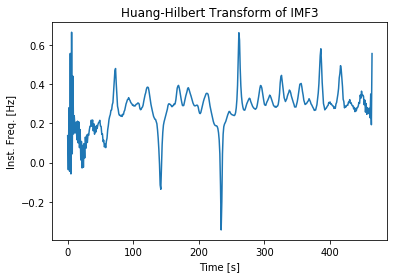

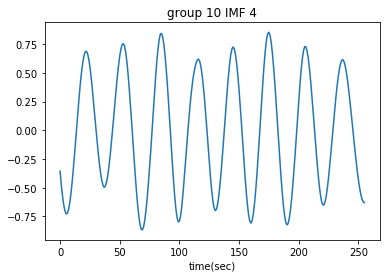

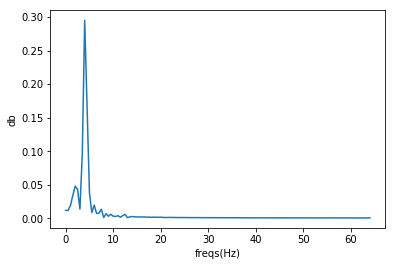

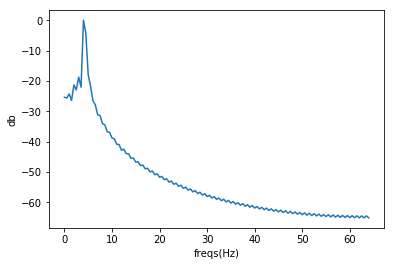

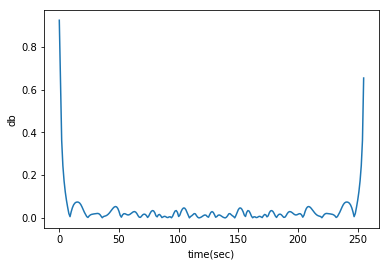

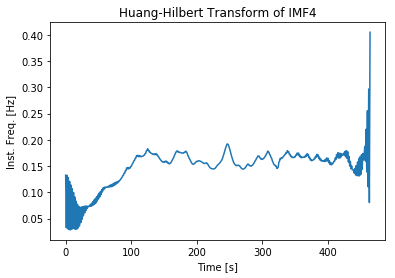

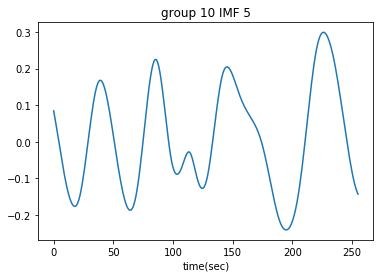

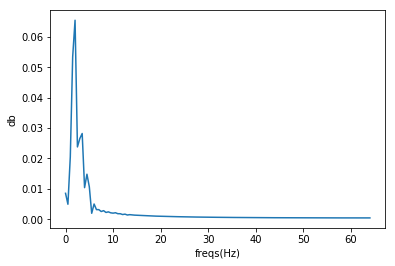

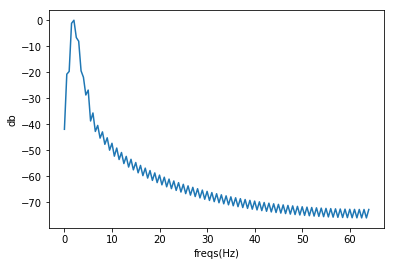

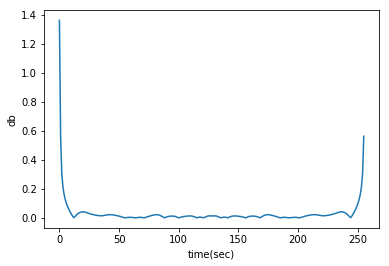

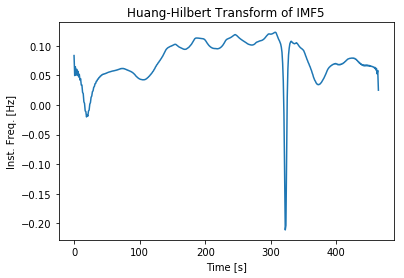

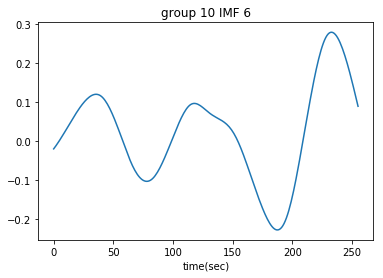

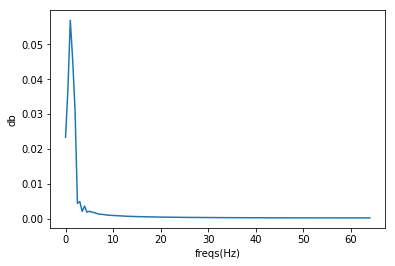

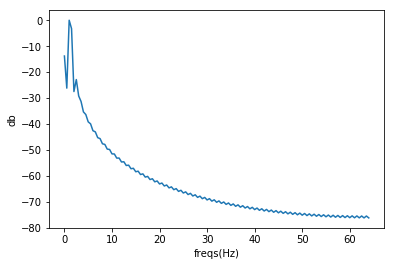

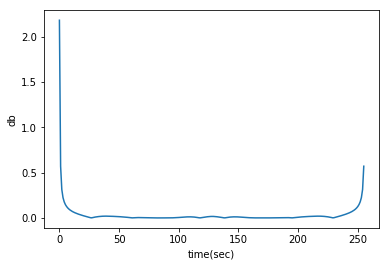

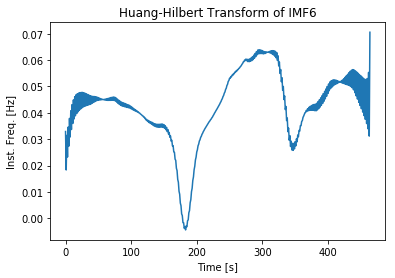

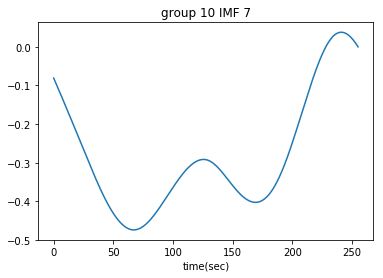

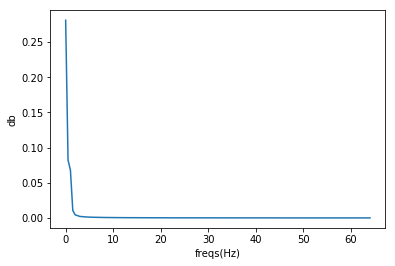

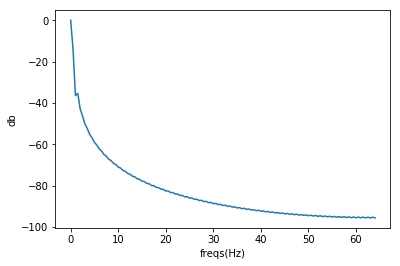

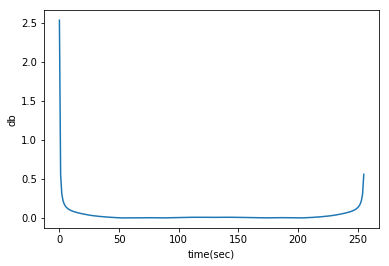

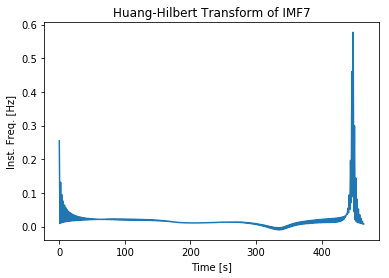

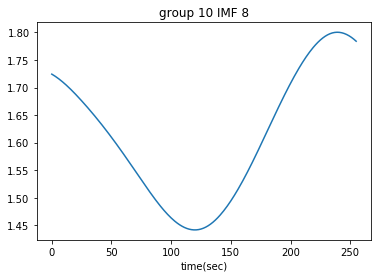

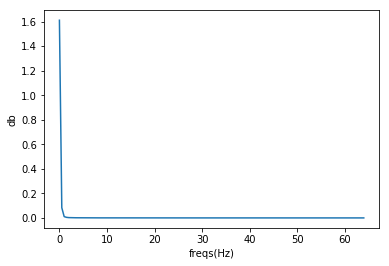

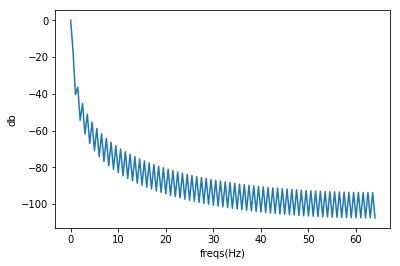

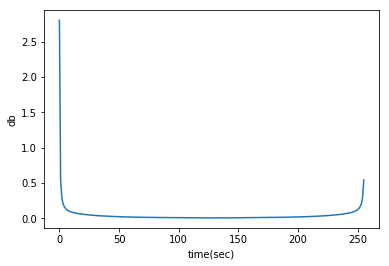

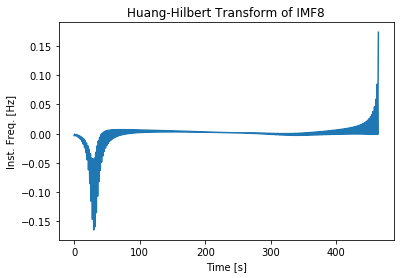

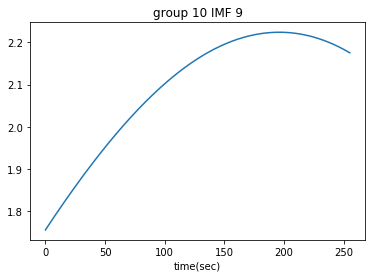

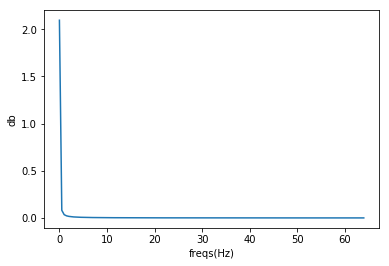

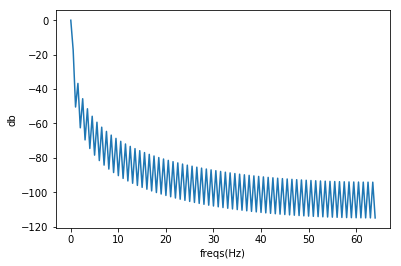

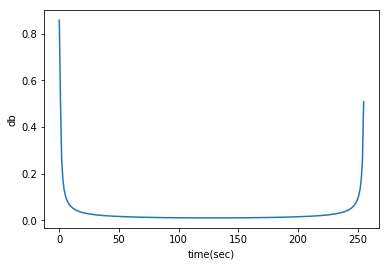

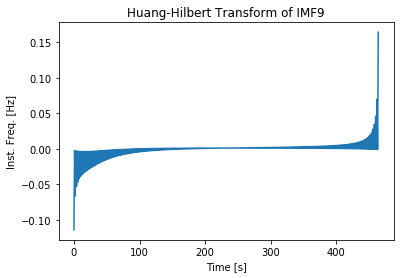

In [25]:
quick_look(group_ht, 1119)

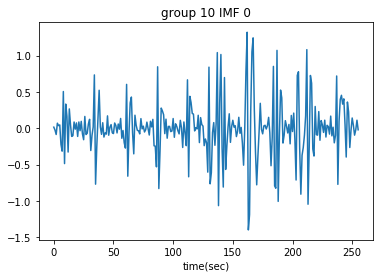

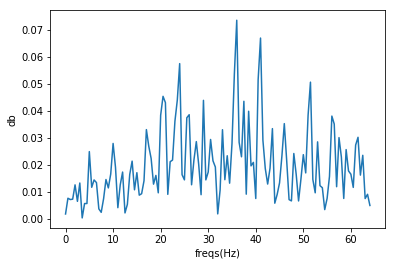

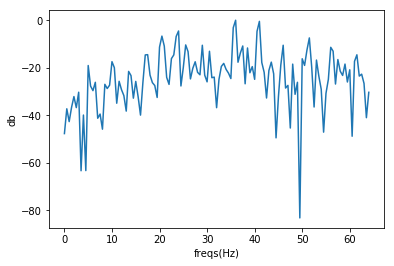

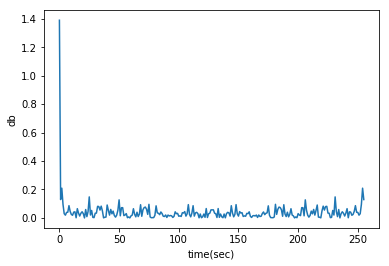

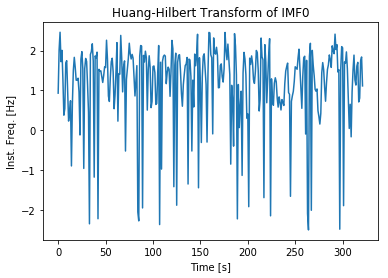

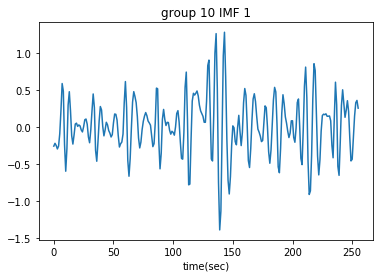

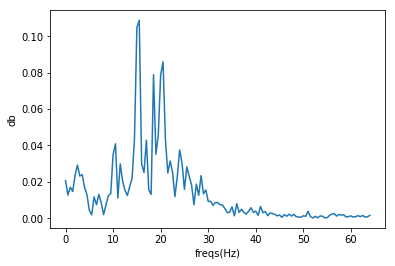

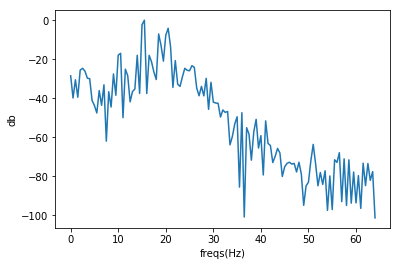

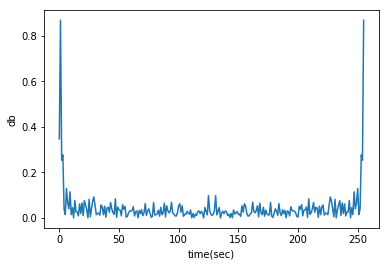

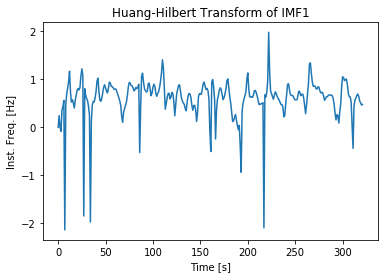

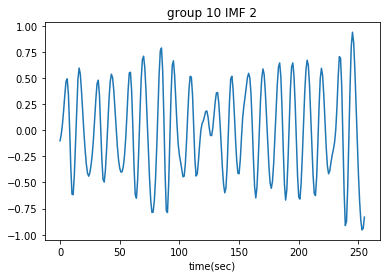

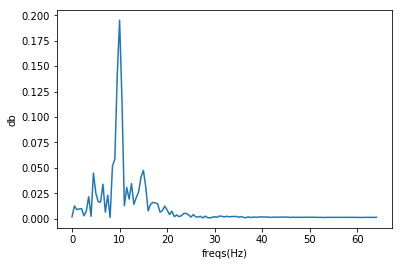

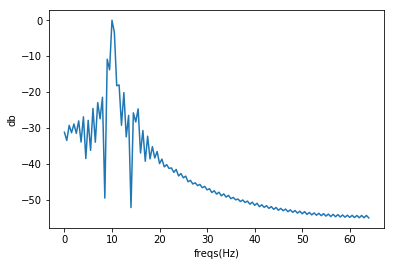

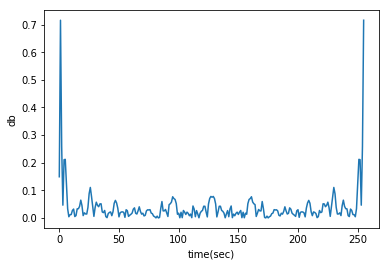

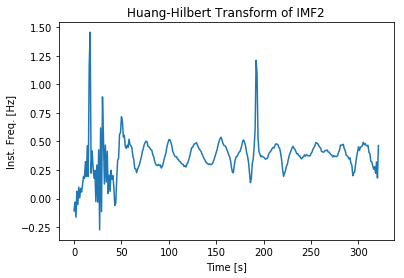

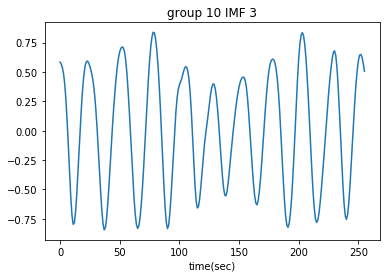

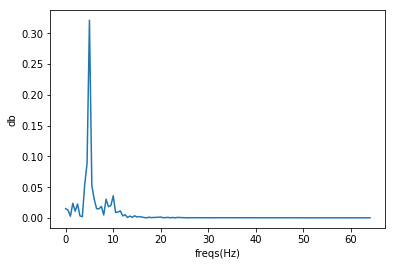

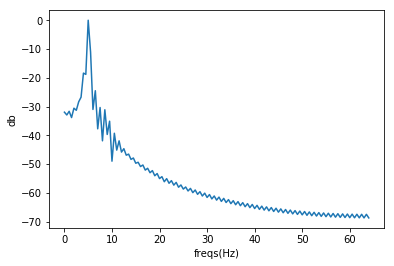

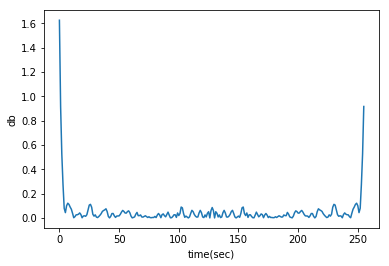

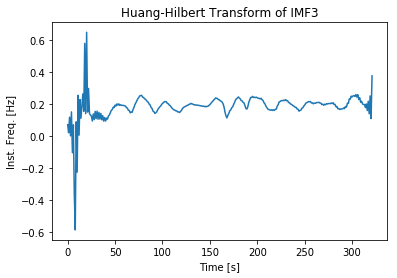

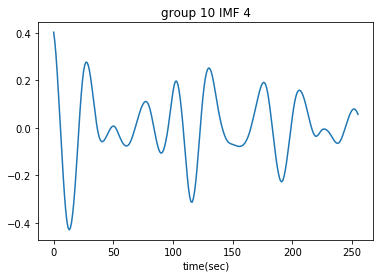

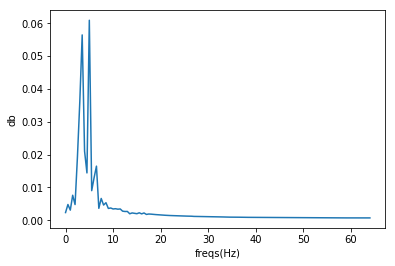

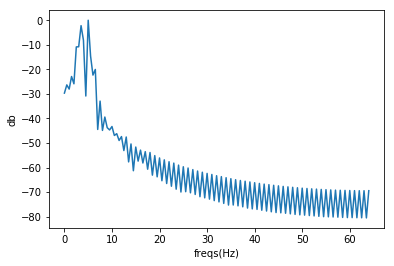

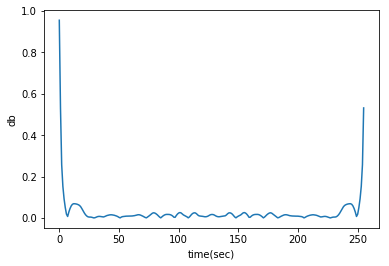

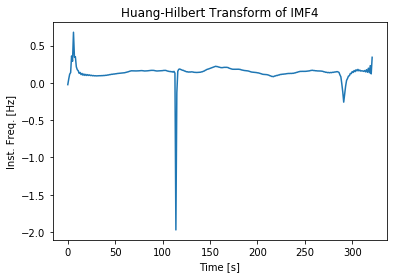

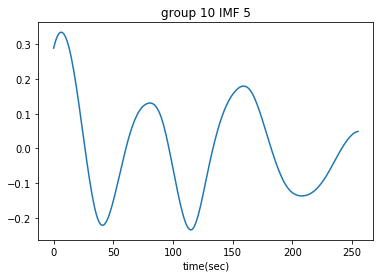

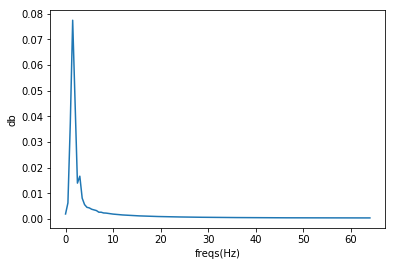

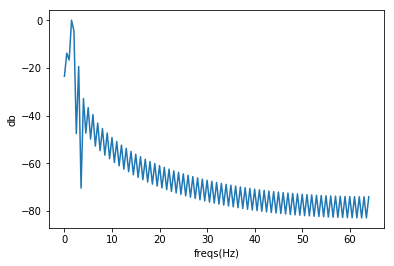

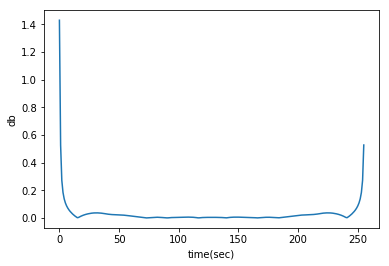

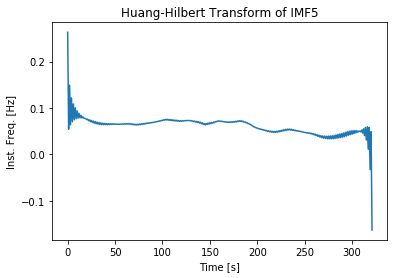

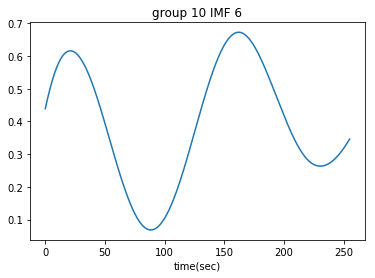

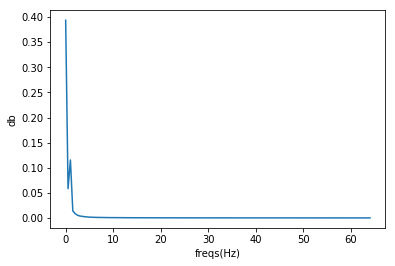

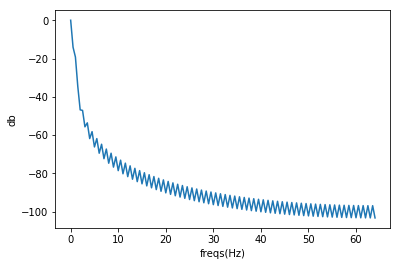

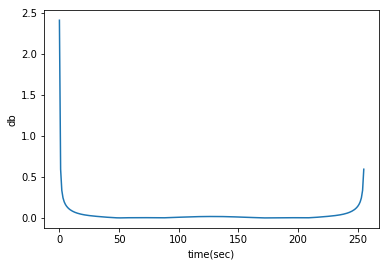

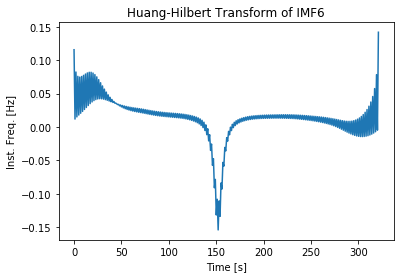

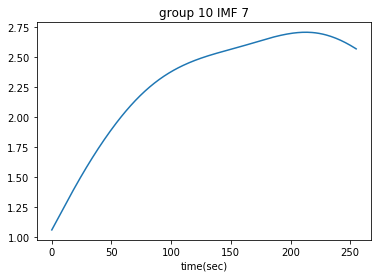

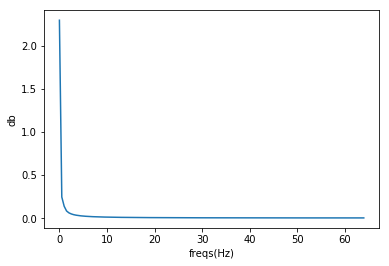

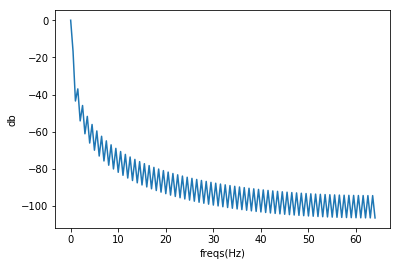

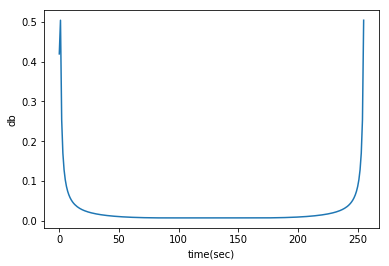

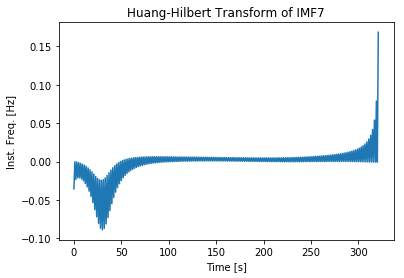

In [26]:
quick_look(group_ht, 100)

In [ ]:
quick_look(group_ht, 10)

group 10


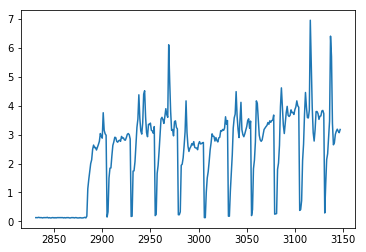

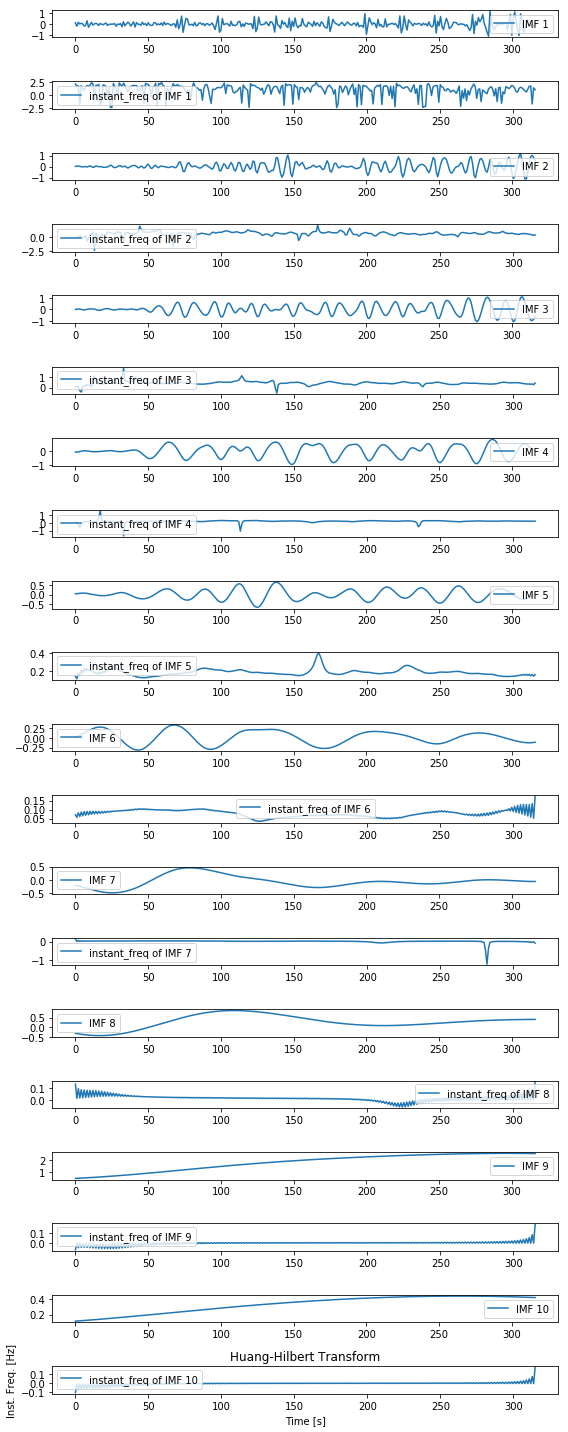

group 500


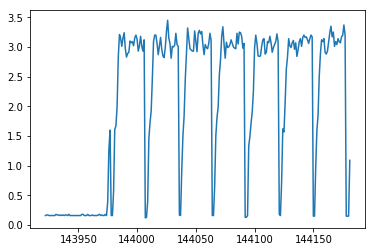

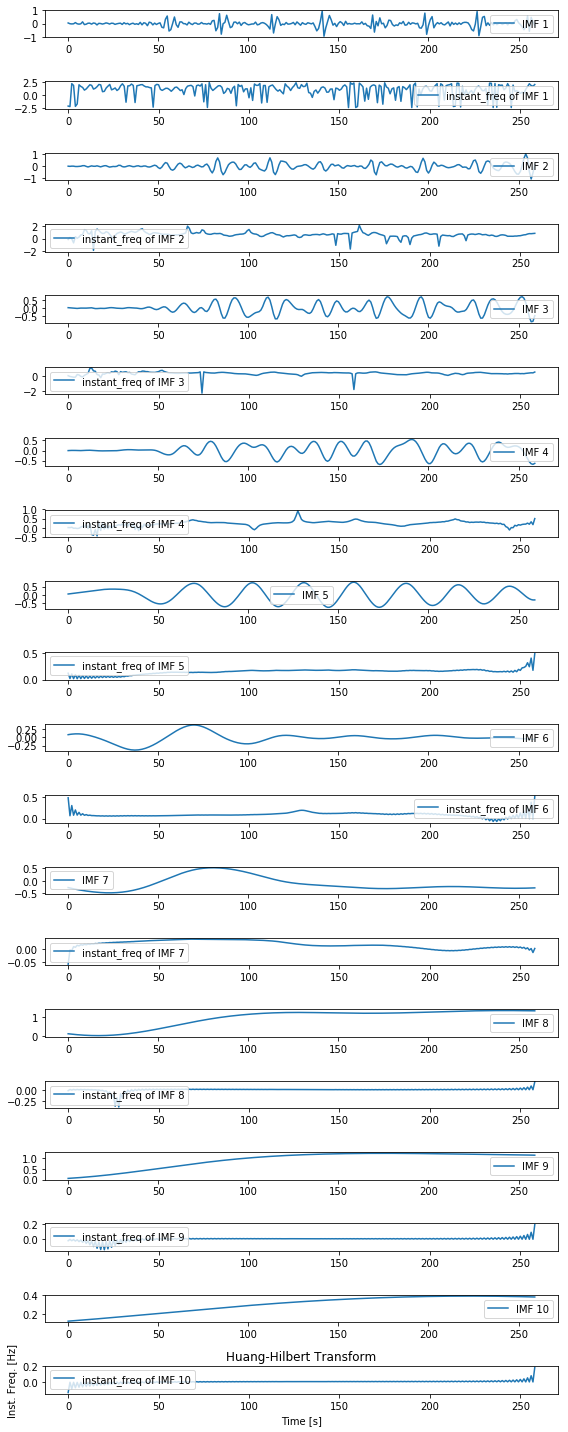

group 1000


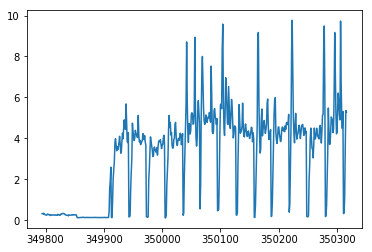

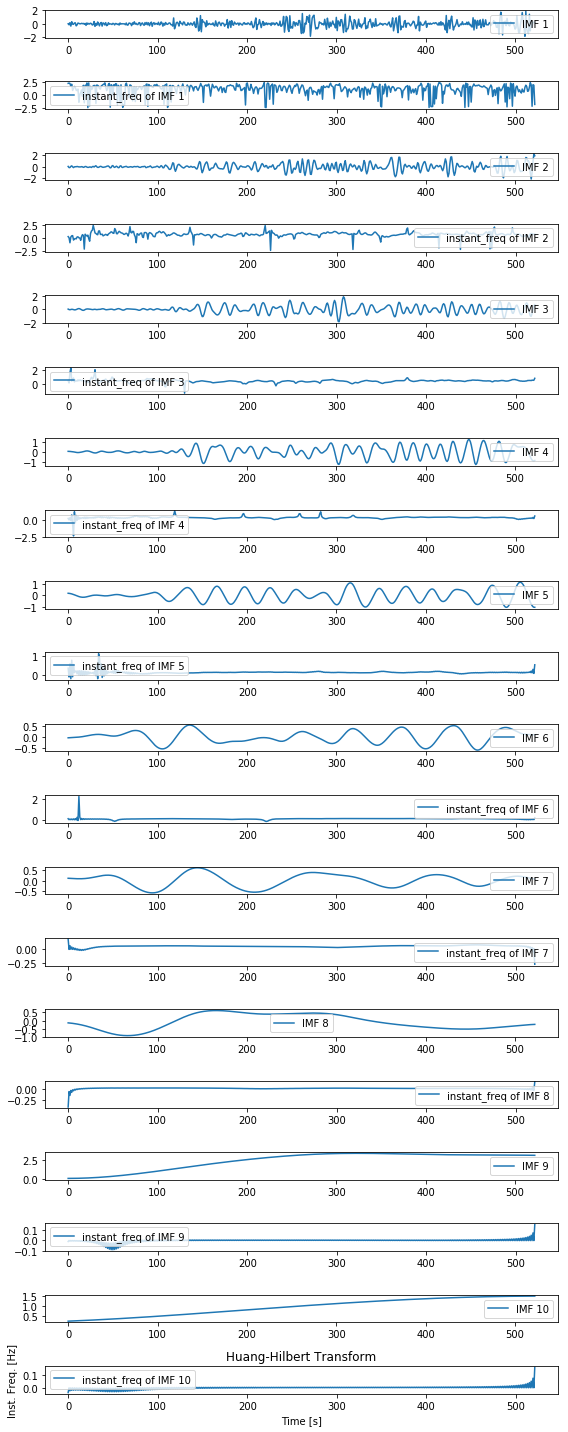

In [25]:

eemd = EEMD()
for g in [10,500,1000]:
    print('group', g)
    data[data['group']==g]['SpindLoad'].plot()
    
    plt.show()
    S = data[data['group']==g]['SpindLoad'].values
    t = np.array([x for x in range(len(S))])
    eIMFs = eemd.eemd(S, t)
    nIMFs = eIMFs.shape[0]
    f = plt.figure(figsize=(8,20))
    dt = 0.2
    instant_phases = instant_phase(eIMFs)
    instant_freqs = np.diff(instant_phases)/(2*np.pi*dt)
    for num, instant_freq in enumerate(instant_freqs):
        ax = f.add_subplot(nIMFs*2, 1, 2*num+1)
        ax.plot(range(len(eIMFs[num])), eIMFs[num], label='IMF %s'%(num+1))
        ax.legend()
        
        ax = f.add_subplot(nIMFs*2, 1, 2*num+2)
        t = range(len(instant_freq))
        ax.plot(t, instant_freq, label='instant_freq of IMF %s'%(num+1))
        ax.legend()

    ax.set_xlabel("Time [s]")
    ax.set_ylabel("Inst. Freq. [Hz]")
    ax.set_title("Huang-Hilbert Transform")

    plt.tight_layout()
        #plt.savefig('hht_example', dpi=120)
    plt.show()


    

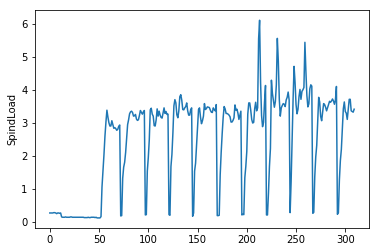

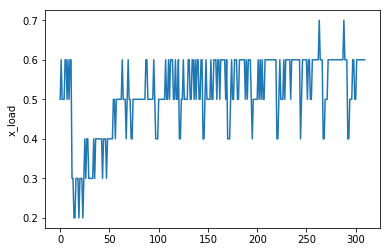

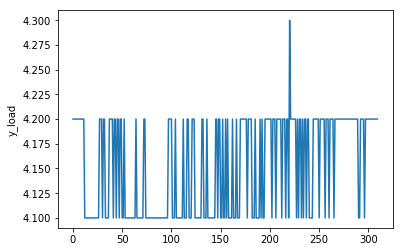

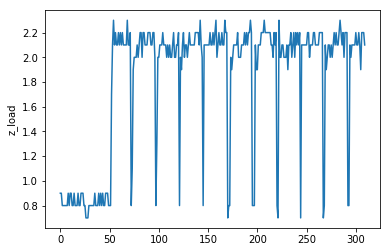

In [105]:
for c in data.columns:
    if 'oad' in c:
        data[data['group']==1][c].plot()
        plt.ylabel(c)
        plt.show()

group 100


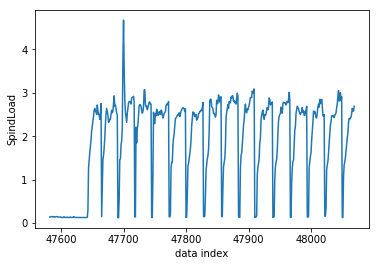

group 200


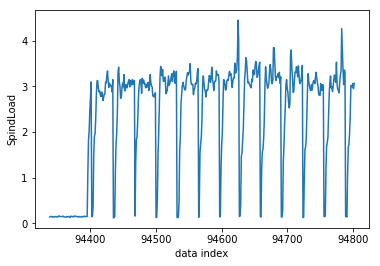

group 300


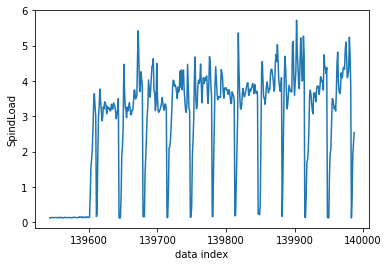

group 400


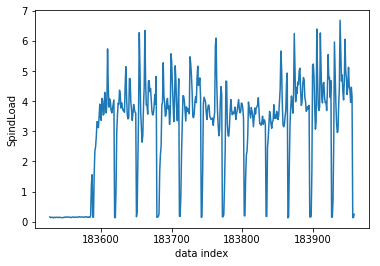

group 500


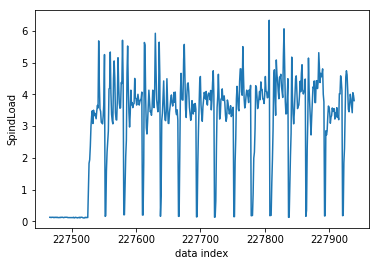

group 600


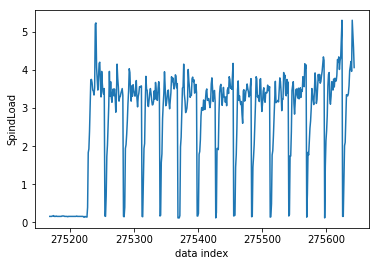

group 700


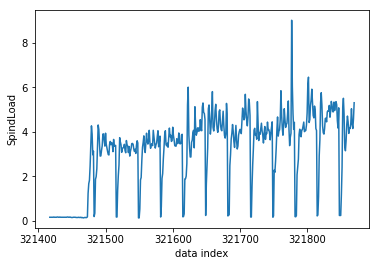

group 800


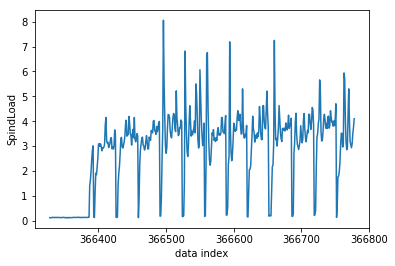

group 900


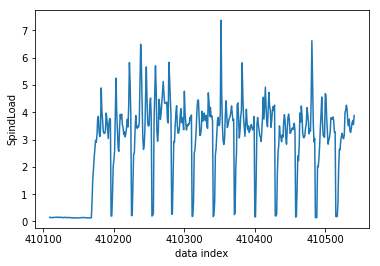

group 1000


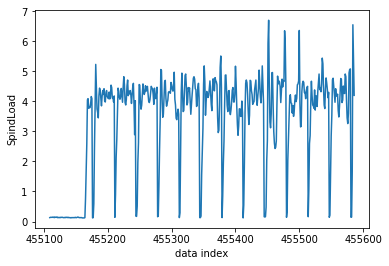

group 1100


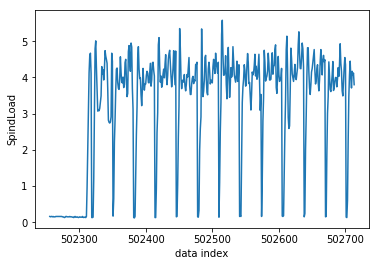

group 1200


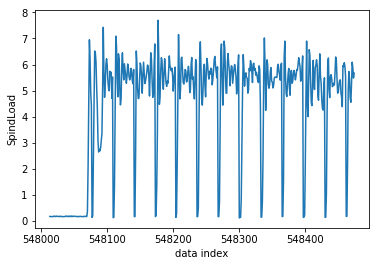

group 1300


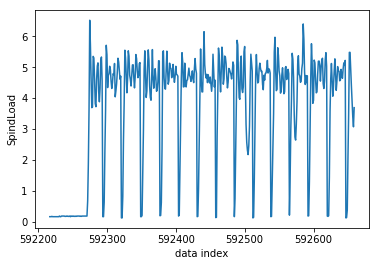

group 1400


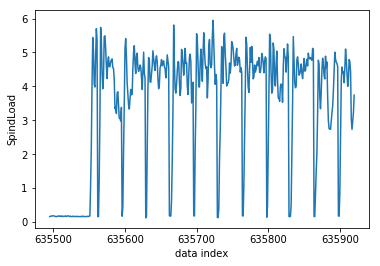

group 1500


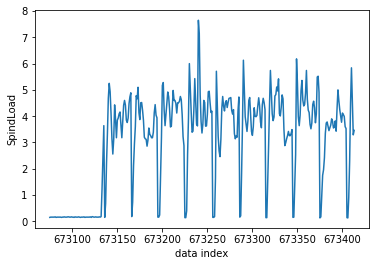

group 1600


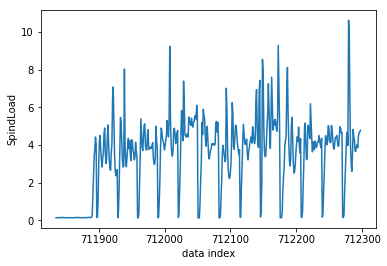

In [83]:
def group_plot(tool_group, col, gap, show_col):
    for g in tool_group[col].unique():
        if g % gap == 0:
            print(col, g)
            tool_group[tool_group[col]==g][show_col].plot()
            plt.ylabel(show_col)
            plt.xlabel('data index')
            #plt.hlines(4, xmin=0, xmax=len(tmp), colors='r', linestyles='-')
            plt.show()    

#group_plot(data, 'subgroup', 500, 'SpindLoad')
group_plot(data, 'group', 100, 'SpindLoad')

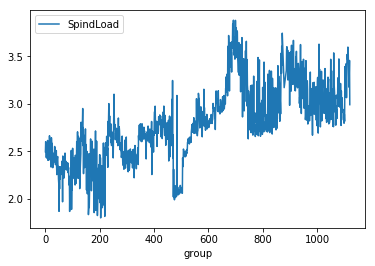

In [125]:
data[['group', 'SpindLoad']].groupby(by=['group']).agg('mean').plot()

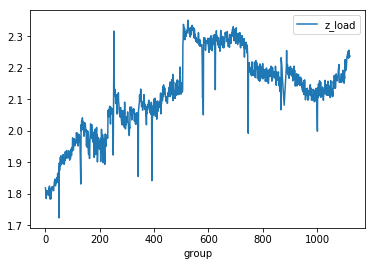

In [123]:
data[['group', 'z_load']].groupby(by=['group']).agg('mean').plot()

In [124]:
data.columns

Index(['CurrentTime', 'SpindLoad', 'x_load', 'y_load', 'z_load', 'Feed',
       'Speed', 'm_abs_x', 'm_abs_y', 'm_abs_z', 'modal_gcode', 'group',
       'subgroup'],
      dtype='object')

In [94]:
### resampling
def plot_sampling_freq(data_count_sec):
    freq_sec = data_count_sec['CurrentTime'].value_counts().to_frame().reset_index()
    freq_sec.columns = ['freq', 'count']
    freq_sec = freq_sec.sort_values(by=['freq'])
    plt.bar(freq_sec['freq'].values, freq_sec['count'].values)
    plt.xlabel('freq')
    plt.ylabel('count')
    print('每秒收集到之訊號的統計')
    plt.show()
    freq_sec

def add_diff_z(data_mean_sec):
    shift_data_mean_sec = data_mean_sec.diff()
    data_mean_sec['diff_z'] = -1 * shift_data_mean_sec['m_abs_z'].values
    data_mean_sec = data_mean_sec[~data_mean_sec['diff_z'].isnull()]
    return data_mean_sec

def resampling(data):
    datetime_rowid = data['CurrentTime'].map(lambda t: pd.to_datetime(t, format='%Y-%m-%d %H:%M:%S:%f'))
    data.index = datetime_rowid
    data_sec = data.resample('S')
    data_count_sec = data_sec.count()
    data_count_sec = data_count_sec[data_count_sec['subgroup']>0]
    plot_sampling_freq(data_count_sec)
    print(data_count_sec.describe())
    data_mean_sec = data_sec.mean().reset_index()
    data_mean_sec.to_csv('data_mean_sec_before.csv', index=False)
    
    for c in data_mean_sec.columns:
        if 'float' in str(data_mean_sec[c].dtype):
            data_mean_sec[c] = round(data_mean_sec[c], 2)
    data_mean_sec = add_diff_z(data_mean_sec)
    data_mean_sec.to_csv('data_mean_sec.csv', index=False)
    return data_mean_sec

### agg by group
def grouping(data):
    gdata = data.groupby(by=['group']).agg(['std', 'mean', 'count', 'sum', np.ptp])
    gdata.columns = gdata.columns.map('_'.join).str.strip('_')
    gdata = gdata.reset_index()
    cols = ['group', 'SpindLoad_std', 'SpindLoad_mean','SpindLoad_count', 'SpindLoad_ptp', 
            'x_load_std', 'x_load_mean', 'x_load_ptp', 
            'y_load_std', 'y_load_mean', 'y_load_ptp',
            'z_load_std', 'z_load_mean', 'z_load_ptp', 'diff_z_sum']
    gdata[cols].to_csv(TOOL + '_tool_group_precessed.csv')
    
    return gdata[cols]

每秒收集到之訊號的統計


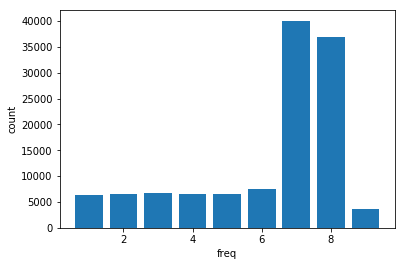

         CurrentTime      SpindLoad         x_load         y_load  \
count  120774.000000  120774.000000  120774.000000  120774.000000   
mean        6.221786       6.221786       6.221786       6.221786   
std         2.172256       2.172256       2.172256       2.172256   
min         1.000000       1.000000       1.000000       1.000000   
25%         5.000000       5.000000       5.000000       5.000000   
50%         7.000000       7.000000       7.000000       7.000000   
75%         8.000000       8.000000       8.000000       8.000000   
max         9.000000       9.000000       9.000000       9.000000   

              z_load           Feed          Speed        m_abs_x  \
count  120774.000000  120774.000000  120774.000000  120774.000000   
mean        6.221786       6.221786       6.221786       6.221786   
std         2.172256       2.172256       2.172256       2.172256   
min         1.000000       1.000000       1.000000       1.000000   
25%         5.000000       5.0000

In [95]:
data_mean_sec = resampling(data)
tmp = grouping(data_mean_sec)


In [87]:
data_mean_sec.head()

CurrentTime  SpindLoad  x_load  y_load  z_load   Feed  Speed  \
1 2018-09-07 11:53:32       0.27    0.06    4.35    0.72  142.0  200.0   
2 2018-09-07 11:53:33       0.28    0.01    4.33    0.77  142.0  200.0   
3 2018-09-07 11:53:34       0.31    0.01    4.31    0.80  142.0  200.0   
4 2018-09-07 11:53:35       0.33    0.03    4.30    0.79  142.0  200.0   
5 2018-09-07 11:53:36       0.26    0.08    4.31    0.81  142.0  200.0   

   m_abs_x  m_abs_y  m_abs_z  group  subgroup  diff_z  
1   -122.0    528.0   304.43    1.0       1.0    1.29  
2   -122.0    528.0   301.89    1.0       1.0    2.54  
3   -122.0    528.0   299.64    1.0       1.0    2.25  
4   -122.0    528.0   297.51    1.0       1.0    2.13  
5   -122.0    528.0   295.00    1.0       1.0    2.51

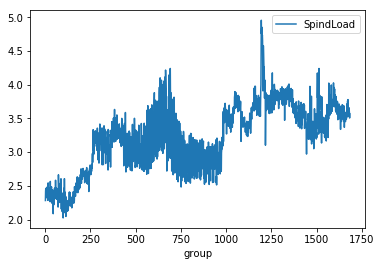

In [88]:
data_mean_sec[['group', 'SpindLoad']].groupby(by=['group']).agg('mean').plot()

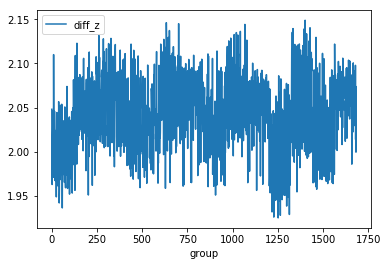

In [89]:
data_mean_sec[['group', 'diff_z']].groupby(by=['group']).agg('mean').plot()

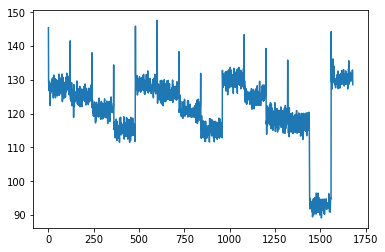

In [90]:
tmp.diff_z_sum.plot()

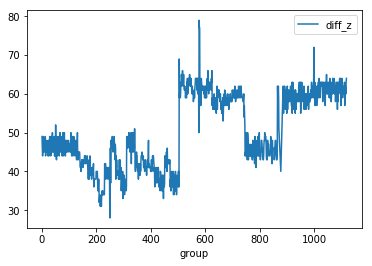

In [73]:
data_mean_sec[['group', 'diff_z']].groupby(by=['group']).agg('count').plot()

In [91]:
tmp[tmp.diff_z_sum>140]

group  SpindLoad_std  SpindLoad_mean  SpindLoad_count  SpindLoad_ptp  \
0        1.0       1.229125        2.282676               71           4.49   
120    121.0       1.156390        2.122647               68           3.50   
480    481.0       1.469910        2.751857               70           4.50   
600    601.0       2.042069        3.483562               73           6.60   
1080  1082.0       1.699740        3.159275               69           4.79   
1560  1564.0       1.871029        3.361765               68           6.50   

      x_load_std  x_load_mean  x_load_ptp  y_load_std  y_load_mean  \
0       0.041213     0.082394        0.17    0.016031     4.303380   
120     0.056116     0.131324        0.22    0.038006     4.376324   
480     0.050030     0.123143        0.20    0.040324     4.411714   
600     0.039189     0.066849        0.20    0.042568     4.408219   
1080    0.042551     0.124783        0.20    0.040847     4.241449   
1560    0.059161     0.170147        0.25    0.039028     4.428088   

      y_load_ptp  z_load_std  z_load_mean  z_load_ptp  diff_z_sum  
0           0.13    0.441709     1.549296        1.30      145.42  
120         0.17    0.635557     1.849559        1.71      141.54  
480         0.19    0.801820     2.183286        2.33      145.89  
600         0.20    0.733161     2.027945        2.20      147.63  
1080        0.11    0.897834     2.378116        2.48      143.36  
1560        0.13    0.965650     2.447941        2.87      144.29